# Info
Name:  

    ORACLES_DARE_explore

Purpose:  

    view the calculated DARE values frrom the 4STAR skyscans, aod, and cloud retrieval

Input:

    None 

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
  
Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:
    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-12-03
    Modified: Samuel LeBlanc, Santa Cruz, CA, 2020-04-14, under stay-at-home order for coronavirus
         - Adding version 3 plotting


# Prepare python environment

In [1]:
import numpy as np
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
import os

In [2]:
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
import plotting_utils as pu

In [3]:
%matplotlib notebook

In [4]:
name = 'ORACLES'
vv = 'v4'
fp = getpath(name)

Return path named:  ORACLES /data/sam/ORACLES/


# Load files

## Load DARE calculations

In [91]:
s = hs.loadmat(fp+'ORACLES_DARE_{}.mat'.format(vv))

In [92]:
s.keys()

[u'sza',
 u'lon',
 u'dn_avg',
 u'ref',
 u'dn',
 u'asy',
 u'zout',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc',
 u'dn_noa',
 u'up_noa_avg',
 u'up',
 u'dare_avg',
 u'ext',
 u'doy',
 u'cod',
 u'dn_noa_avg',
 u'up_avg',
 u'up_noa']

In [93]:
s['dare'].shape

(27672, 3)

In [7]:
ss = hs.loadmat(fp+'ORACLES_DARE_aero_prop_{}.mat'.format(vv))

IOError: Unable to open file (unable to open file: name = '/data/sam/ORACLES/ORACLES_DARE_aero_prop_v4.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [8]:
s['sza'] = ss['sza']

NameError: name 'ss' is not defined

### Load the instant to 24h DARE ratio

In [9]:
import pandas as pd

In [10]:
fp

u'/data/sam/ORACLES/'

In [11]:
inst2day = pd.read_csv(fp+'data_other/DARE_instant_over_24h_Redemann_2006.dat')

In [12]:
i2d = inst2day.to_numpy() #mu, ratio (i/24h)

In [13]:
i2d

array([[0.0182, 0.0296],
       [0.024 , 0.0564],
       [0.0298, 0.0887],
       [0.0356, 0.129 ],
       [0.0412, 0.1775],
       [0.0475, 0.2133],
       [0.0531, 0.2467],
       [0.0589, 0.2909],
       [0.0647, 0.3465],
       [0.0704, 0.4058],
       [0.0753, 0.4603],
       [0.0806, 0.5151],
       [0.0864, 0.5789],
       [0.0922, 0.6419],
       [0.098 , 0.699 ],
       [0.1038, 0.755 ],
       [0.1096, 0.804 ],
       [0.1154, 0.8644],
       [0.1213, 0.92  ],
       [0.1271, 0.9745],
       [0.1329, 1.0304],
       [0.1386, 1.0882],
       [0.1445, 1.1342],
       [0.1503, 1.1827],
       [0.1561, 1.2318],
       [0.162 , 1.2791],
       [0.1678, 1.3246],
       [0.1736, 1.3678],
       [0.1794, 1.4111],
       [0.1852, 1.4482],
       [0.191 , 1.4826],
       [0.1968, 1.5184],
       [0.2027, 1.5503],
       [0.2085, 1.5808],
       [0.2143, 1.6123],
       [0.2201, 1.6408],
       [0.2259, 1.6683],
       [0.2317, 1.6945],
       [0.2375, 1.7209],
       [0.2431, 1.7502],


In [94]:
s['dare'].shape

(27672, 3)

In [370]:
s['mu'] = np.cos(np.deg2rad(s['sza']))

In [371]:
i_fac = [np.argmin(abs(i2d[:,0]-mu)) for mu in s['mu']]

In [95]:
s['dare_24h'] = s['dare']*2.0+np.nan

In [96]:
s['dare_24h'][:,0] = s['dare'][:,0]/i2d[i_fac,1]
s['dare_24h'][:,1] = s['dare'][:,1]/i2d[i_fac,1]
s['dare_24h'][:,2] = s['dare'][:,2]/i2d[i_fac,1]

## Load the 24h DARE calculations

In [41]:
sh = hs.loadmat(fp+'ORACLES_DARE_{}_24h.mat'.format(vv))

In [19]:
sh.keys()

[u'sza',
 u'lon',
 u'dn_avg',
 u'ref',
 u'dn',
 u'asy',
 u'zout',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc',
 u'dn_noa',
 u'up_noa_avg',
 u'up',
 u'dare_avg',
 u'ext',
 u'doy',
 u'cod',
 u'dn_noa_avg',
 u'up_avg',
 u'up_noa']

In [20]:
utcx = np.arange(0,24,0.5)

In [21]:
ig = np.where(np.isfinite(sh['dare_avg'][:,2]) & (sh['dare_avg'][:,2] != 0.0) & (abs(sh['dare_avg'][:,2]) > 0.25))[0]

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


### Check the daily edges

In [22]:
from matplotlib import animation, rc

In [23]:
print sh['dn'][ig[0],:,2] - sh['dn_noa'][ig[0],:,2]

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.93999888e-09
 -4.85899818e-08 -9.28499730e-08 -1.13790009e-07 -1.42590011e-07
 -1.89530056e-07 -1.79069957e-07 -2.13210001e-07 -1.83229986e-07
 -2.21040182e-07 -1.96479959e-07 -1.82940084e-07 -2.47420076e-07
 -1.94609811e-07 -1.74809884e-07 -1.89729917e-07 -2.02750016e-07
 -1.78649998e-07 -1.67700023e-07 -1.36940002e-07 -1.13290014e-07
 -9.80199957e-08 -4.03800016e-08 -1.60000013e-10  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [24]:
sh['zout']

[0, 1.5, 100.0]

<IPython.core.display.Javascript object>


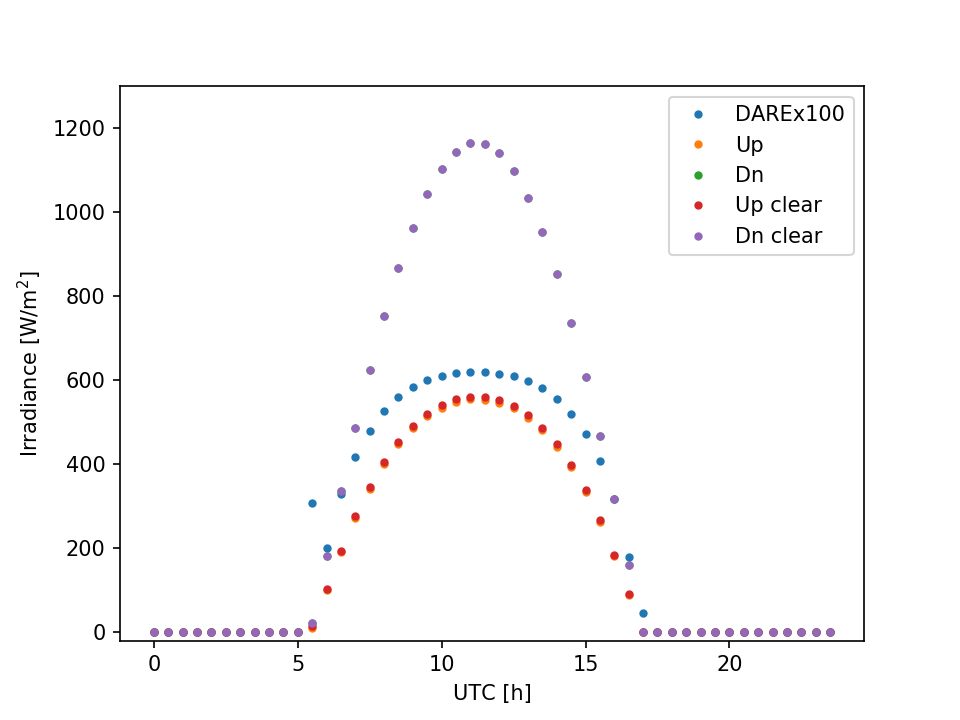

(-20, 1300)

In [25]:
fig = plt.figure()
line = []
line.append(plt.plot(utcx,sh['dare'][ig[0],:,2]*100.0,'.',label='DAREx100')[0])
line.append(plt.plot(utcx,sh['up'][ig[0],:,2],'.',label='Up')[0])
line.append(plt.plot(utcx,sh['dn'][ig[0],:,2],'.',label='Dn')[0])
line.append(plt.plot(utcx,sh['up_noa'][ig[0],:,2],'.',label='Up clear')[0])
line.append(plt.plot(utcx,sh['dn_noa'][ig[0],:,2],'.',label='Dn clear')[0])
plt.xlabel('UTC [h]')
plt.ylabel('Irradiance [W/m$^2$]')
plt.legend()
plt.ylim(-20,1300)

In [29]:
def init():
    for l in line:
        l.set_data([], [])
    return (line,)

In [26]:
def animate(i):
    line[0].set_data(utcx, sh['dare'][ig[i],:,2]*100.0)
    line[1].set_data(utcx, sh['up'][ig[i],:,2])
    line[2].set_data(utcx, sh['dn'][ig[i],:,2])
    line[3].set_data(utcx, sh['up_noa'][ig[i],:,2])
    line[4].set_data(utcx, sh['dn_noa'][ig[i],:,2])
    line[0].axes.set_title('{:d}'.format(ig[i]))
    return (line,)

In [27]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(ig), interval=1, 
                               blit=True)

NameError: name 'init' is not defined

<IPython.core.display.Javascript object>


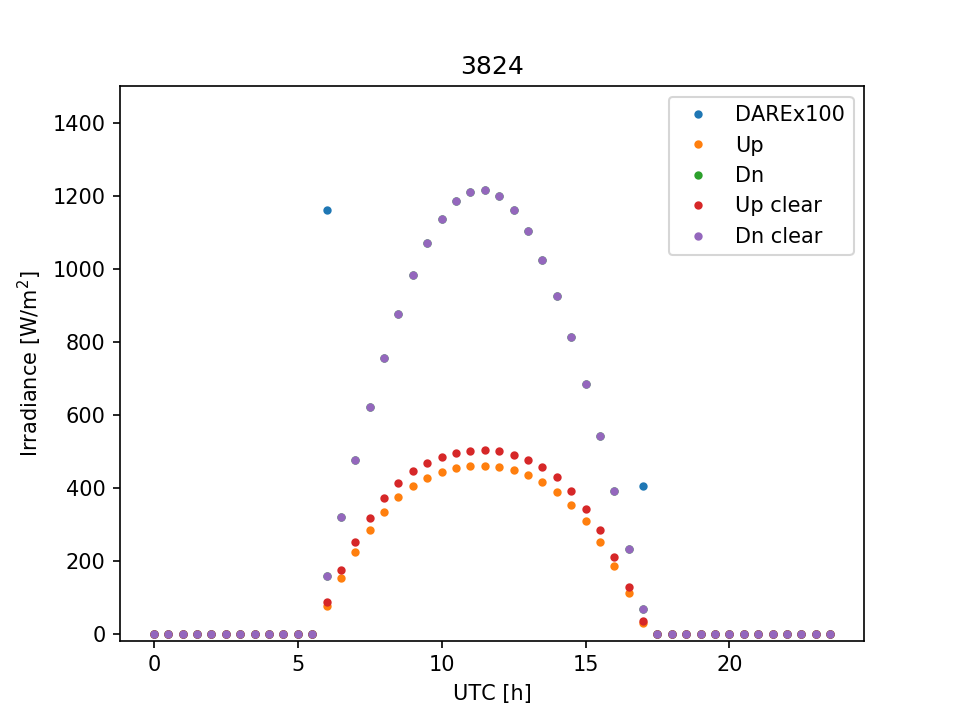

In [30]:
fig = plt.figure()
line = []
line.append(plt.plot(utcx,sh['dare'][ig[0],:,2]*100.0,'.',label='DAREx100')[0])
line.append(plt.plot(utcx,sh['up'][ig[0],:,2],'.',label='Up')[0])
line.append(plt.plot(utcx,sh['dn'][ig[0],:,2],'.',label='Dn')[0])
line.append(plt.plot(utcx,sh['up_noa'][ig[0],:,2],'.',label='Up clear')[0])
line.append(plt.plot(utcx,sh['dn_noa'][ig[0],:,2],'.',label='Dn clear')[0])
plt.xlabel('UTC [h]')
plt.ylabel('Irradiance [W/m$^2$]')
plt.legend()
plt.ylim(-20,1500)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(ig), interval=1, 
                               blit=True)
anim

<IPython.core.display.Javascript object>


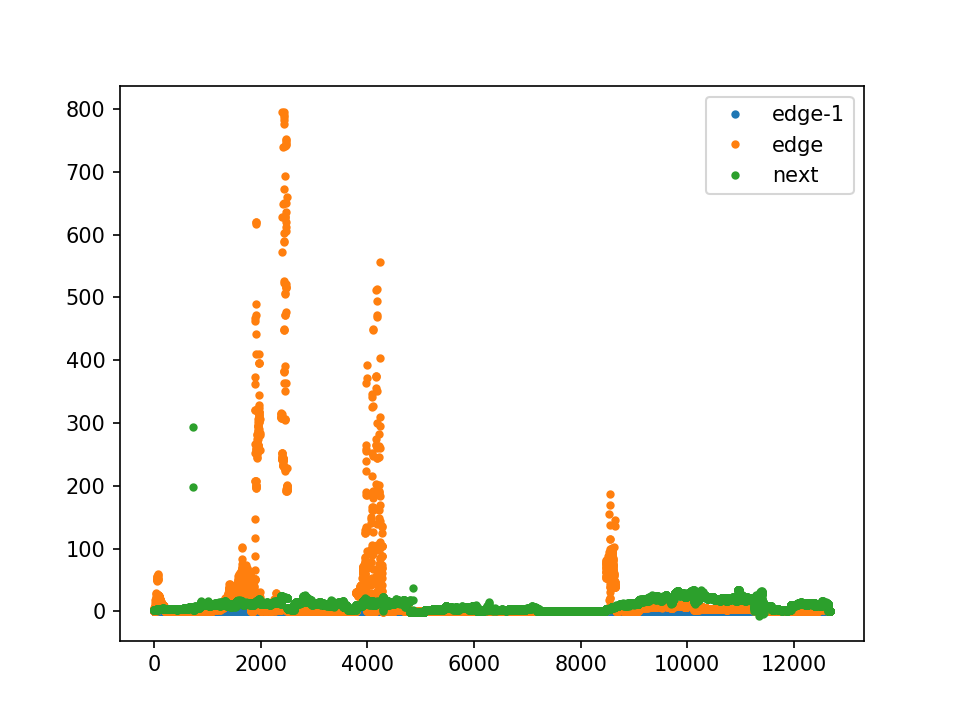

In [31]:
plt.figure()
plt.plot(sh['dare'][ig,10,2],'.',label='edge-1')
plt.plot(sh['dare'][ig,11,2],'.',label='edge')
plt.plot(sh['dare'][ig,12,2],'.',label='next')
plt.legend()

<IPython.core.display.Javascript object>


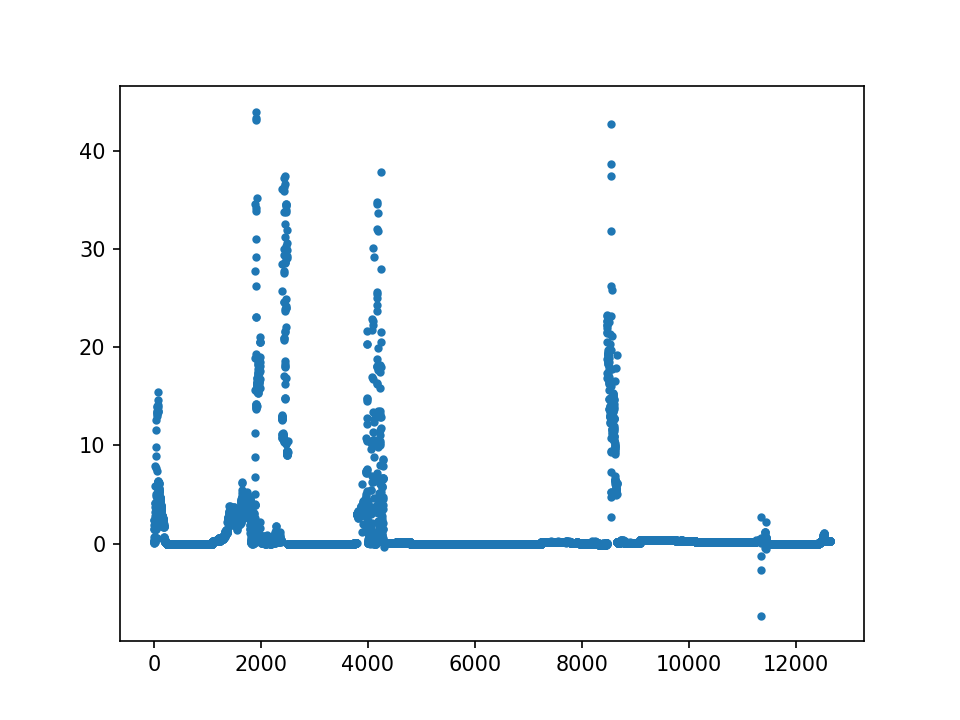

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


In [68]:
plt.figure()
plt.plot(sh['dare'][ig,11,2]/sh['dare'][ig,12,2],'.')

<IPython.core.display.Javascript object>


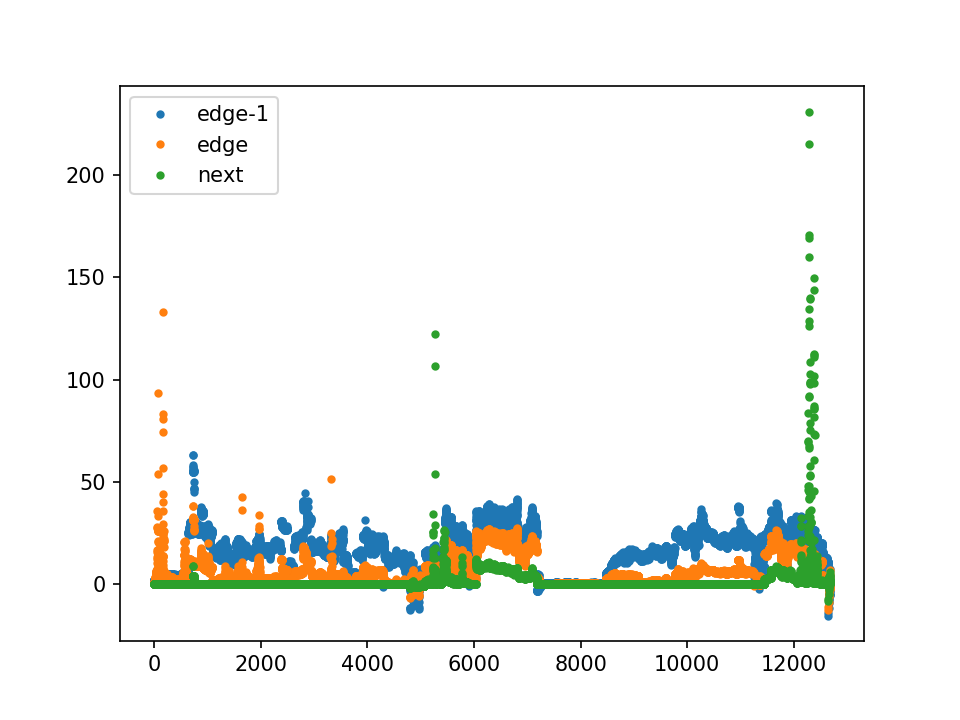

In [32]:
plt.figure()
plt.plot(sh['dare'][ig,33,2],'.',label='edge-1')
plt.plot(sh['dare'][ig,34,2],'.',label='edge')
plt.plot(sh['dare'][ig,35,2],'.',label='next')
plt.legend()

### Adjust the calculated DARE for issues with the edges

In [33]:
bad_edge = abs(sh['dare'][:,11,2])>abs(sh['dare'][:,12,2]) 
bad_edge2 = (abs(sh['dare'][:,34,2])>abs(sh['dare'][:,33,2]))
bad_edge3 = (abs(sh['dare'][:,35,2])>abs(sh['dare'][:,34,2]))

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
sh['dare'][bad_edge,11,2] = sh['dare'][bad_edge,12,2]*0.1
sh['dare'][bad_edge2,34,2] = sh['dare'][bad_edge2,33,2]*0.1
sh['dare'][bad_edge3,35,2] = sh['dare'][bad_edge3,34,2]*0.1

In [35]:
a = np.array([[1,2,3],[2,3,4],[4,5,6],[7,8,9]])

In [36]:
a.shape

(4, 3)

In [37]:
np.nanmean(a,axis=0)

array([3.5, 4.5, 5.5])

In [38]:
sh['dare_avg'][:,2] = np.nanmean(sh['dare'][:,:,2],axis=1)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


## Load the DARE 24h with diurnal changing clouds

In [42]:
shd = hs.loadmat(fp+'ORACLES_DARE_{}_24h_diurnal.mat'.format(vv))

In [43]:
shd.keys()

[u'zout',
 u'refs',
 u'sza',
 u'cods',
 u'lon',
 u'dn_avg',
 u'ref',
 u'dn',
 u'asy',
 u'up_noa',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc',
 u'dn_noa',
 u'up_noa_avg',
 u'up',
 u'dare_avg',
 u'ext',
 u'doy',
 u'cod',
 u'dn_noa_avg',
 u'up_avg']

### Check and adjust the daily edges

<IPython.core.display.Javascript object>


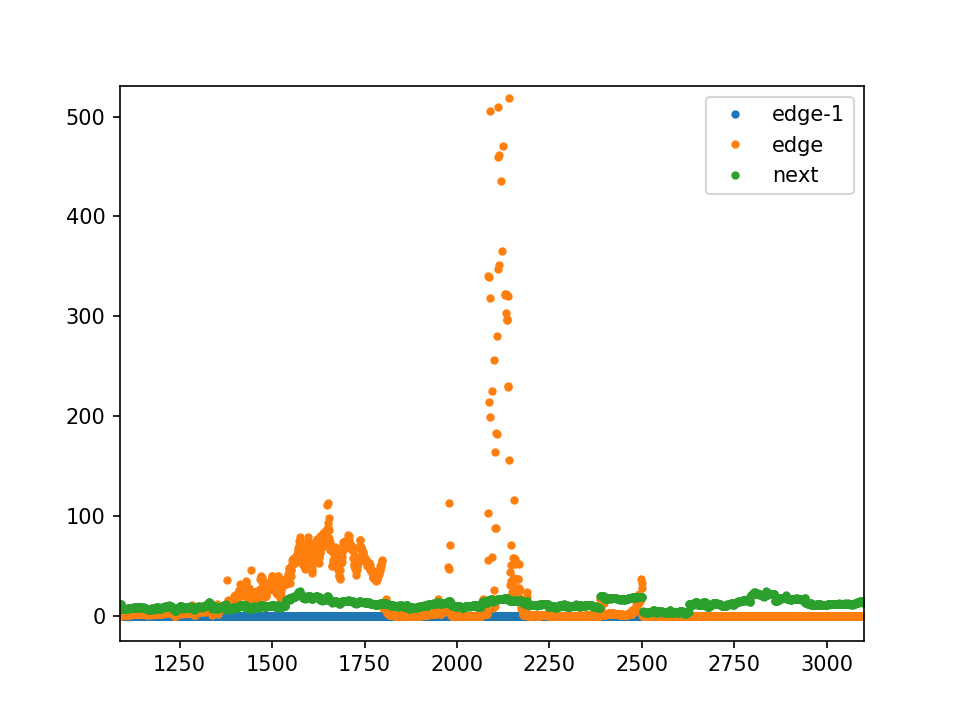

In [44]:
plt.figure()
plt.plot(shd['dare'][ig,10,2],'.',label='edge-1')
plt.plot(shd['dare'][ig,11,2],'.',label='edge')
plt.plot(shd['dare'][ig,12,2],'.',label='next')
plt.legend()

In [45]:
bad_edged = abs(shd['dare'][:,11,2])>abs(shd['dare'][:,12,2]) 
bad_edge2d = (abs(shd['dare'][:,34,2])>abs(shd['dare'][:,33,2]))
bad_edge3d = (abs(shd['dare'][:,35,2])>abs(shd['dare'][:,34,2]))

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
shd['dare'][bad_edged,11,2] = shd['dare'][bad_edged,12,2]*0.1
shd['dare'][bad_edge2d,34,2] = shd['dare'][bad_edge2d,33,2]*0.1
shd['dare'][bad_edge3d,35,2] = shd['dare'][bad_edge3d,34,2]*0.1

In [47]:
shd['dare_avg'][:,2] = np.nanmean(shd['dare'][:,:,2],axis=1)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


## Load DARE parameters from SARE

In [130]:
sa = sio.loadmat(fp+'ORACLES_2016_DARE_params_{}_px.mat'.format('v4'))

In [131]:
sa.keys()

['bins_ew_px',
 'boxes_ew_ct',
 'sza',
 'boxes_ns_ct',
 'bins_diag_p',
 'boxes_ns',
 'lon',
 '__version__',
 'boxes_ew',
 'bins_ns_p',
 'boxes_diag',
 'dare_p',
 'lat',
 'bins_ew_p',
 'utc',
 'bins_diag_px',
 'bins_ns_px',
 '__header__',
 '__globals__',
 'boxes_diag_ct',
 'doy',
 'dare_px']

## Load DARE from ALADIN

In [53]:
AL_dare_2016 = np.array([3.68,4.86,4.34,3.79,1.31,0.48,0.26,-0.02])
AL_Lat = np.array([-14.0,-12.0,-10.0,-8.0,-6.0,-4.0,-2.0,0.0])

# Plot out data

In [101]:
s['doy']

array([244, 244, 244, ..., 271, 271, 271])

In [102]:
s['doys'] = s['doy']+s['utc']/24.0

In [103]:
ibad = (s['ref']==0.0) | (s['ref']>=25.0) | (s['cod']==0.0)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.


In [104]:
s['cod'][ibad] = np.nan
s['ref'][ibad] = np.nan
s['dn'][ibad,:] = np.nan
s['up'][ibad,:] = np.nan
s['dn_noa'][ibad,:] = np.nan
s['up_noa'][ibad,:] = np.nan
s['dare'][ibad,:] = np.nan

## Plot the time trace

<IPython.core.display.Javascript object>


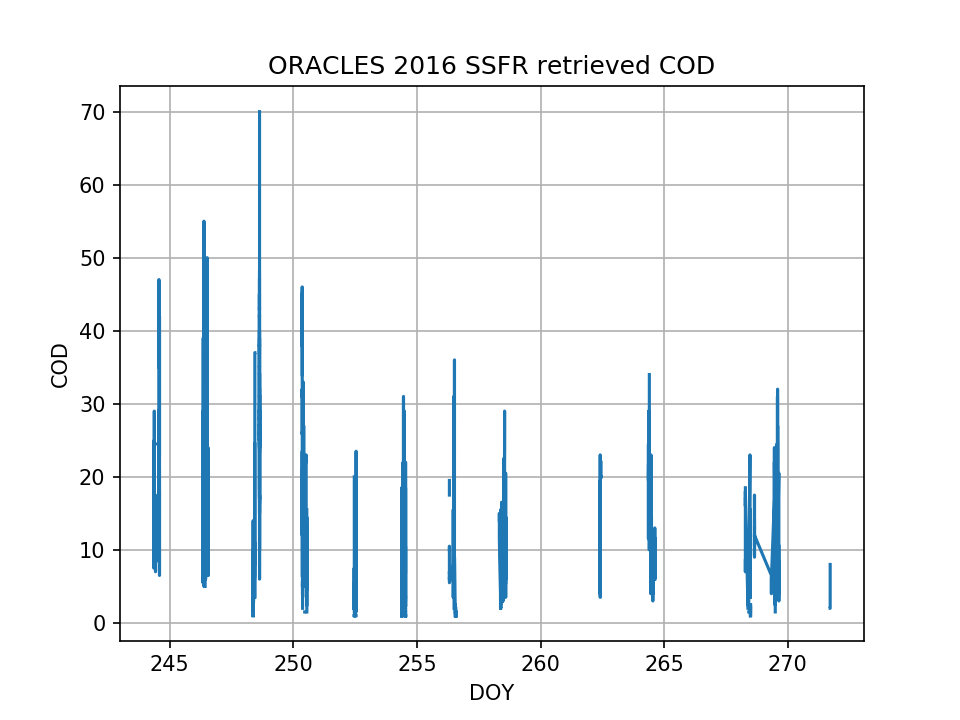

Text(0.5,1,'ORACLES 2016 SSFR retrieved COD')

In [58]:
plt.figure()
plt.plot(s['doys'],s['cod'])
plt.xlabel('DOY')
plt.ylabel('COD')
plt.grid()
plt.title('ORACLES 2016 SSFR retrieved COD')

<IPython.core.display.Javascript object>


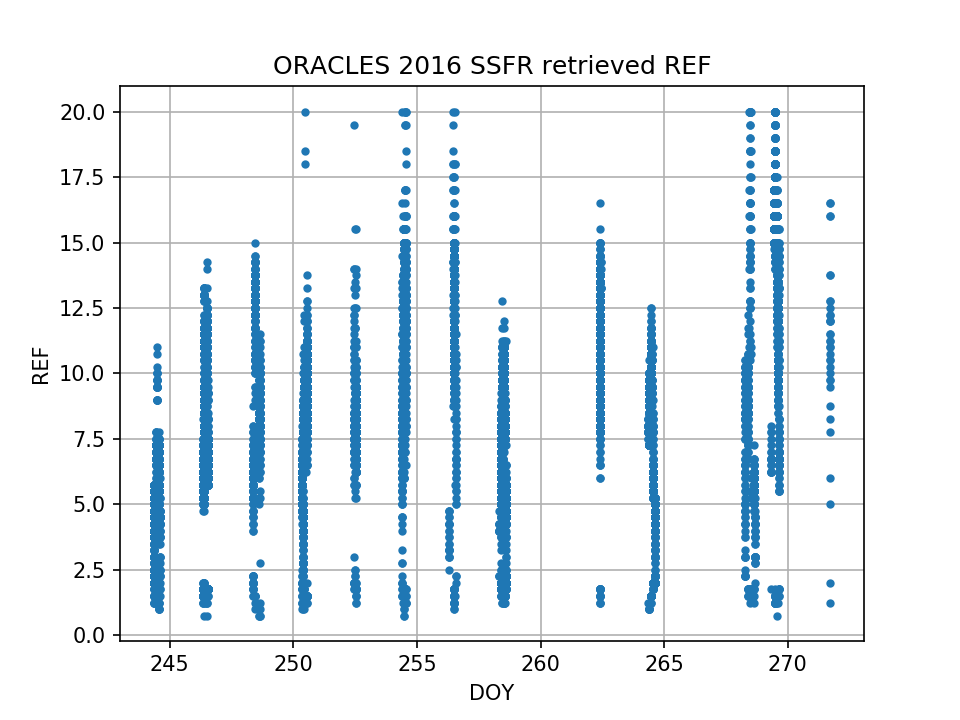

Text(0.5,1,'ORACLES 2016 SSFR retrieved REF')

In [59]:
plt.figure()
plt.plot(s['doys'],s['ref'],'.')
plt.xlabel('DOY')
plt.ylabel('REF')
plt.grid()
plt.title('ORACLES 2016 SSFR retrieved REF')

## histogram of retrieved properties

<IPython.core.display.Javascript object>


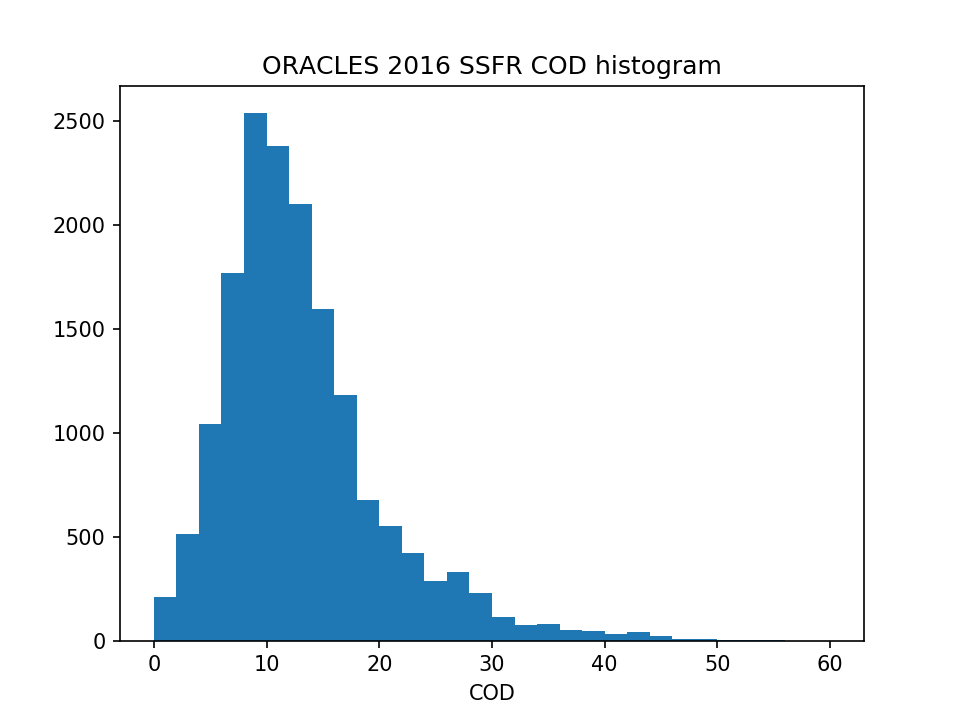

/home/sam/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sam/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5,1,'ORACLES 2016 SSFR COD histogram')

In [60]:
plt.figure()
plt.hist(s['cod'],range=[0,60],bins=30)
plt.xlabel('COD')
plt.title('ORACLES 2016 SSFR COD histogram')

<IPython.core.display.Javascript object>


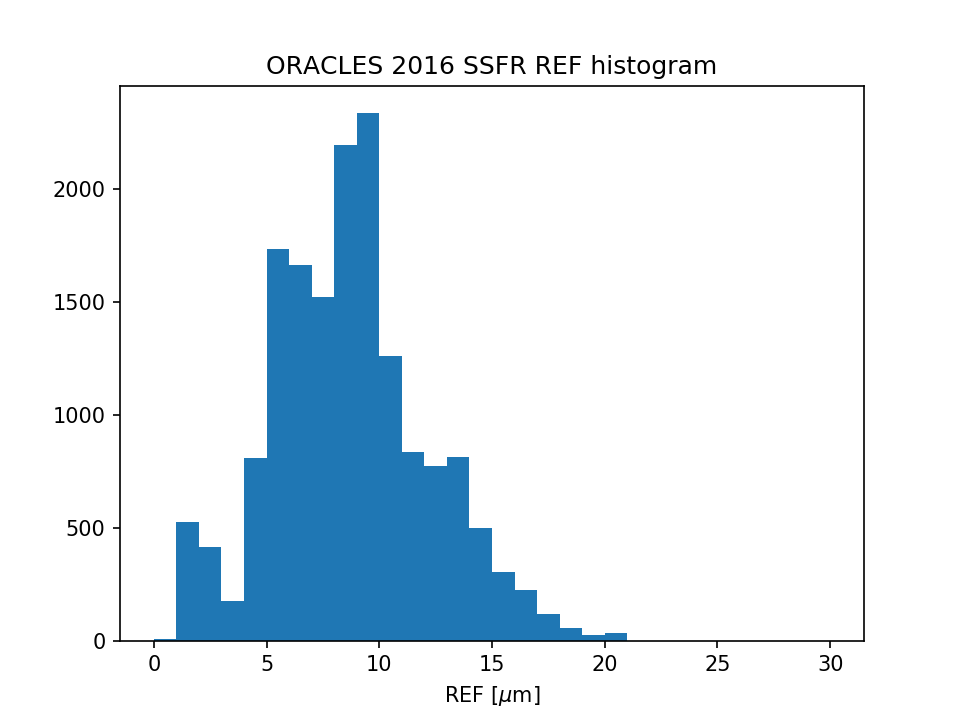

Text(0.5,1,'ORACLES 2016 SSFR REF histogram')

In [23]:
plt.figure()
plt.hist(s['ref'],range=[0,30],bins=30)
plt.xlabel('REF [${{\\mu}}$m]')
plt.title('ORACLES 2016 SSFR REF histogram')

<IPython.core.display.Javascript object>


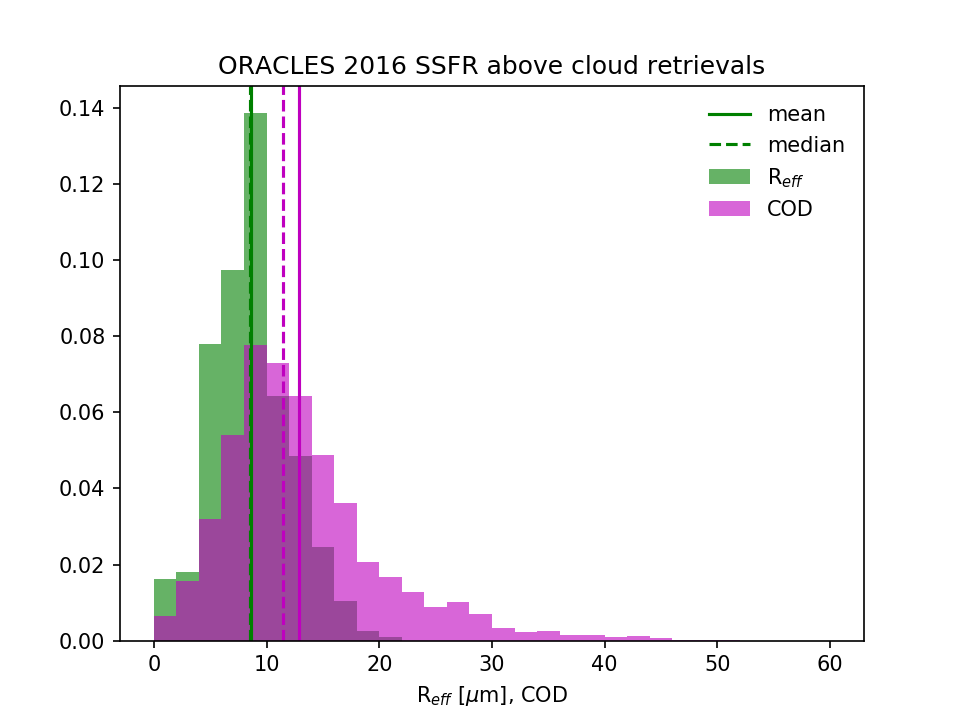

/home/sam/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [61]:
plt.figure()
plt.hist(s['ref'],range=[0,60],bins=30,label='R$_{{eff}}$',alpha=0.6,normed=True,color='g')
plt.hist(s['cod'],range=[0,60],bins=30,label='COD',alpha=0.6,normed=True,color='m')

plt.axvline(np.nanmean(s['ref']),ls='-',color='g',label='mean')
plt.axvline(np.nanmedian(s['ref']),ls='--',color='g',label='median')

plt.axvline(np.nanmean(s['cod']),ls='-',color='m')
plt.axvline(np.nanmedian(s['cod']),ls='--',color='m')
plt.legend(frameon=False)
plt.title('ORACLES 2016 SSFR above cloud retrievals')

plt.xlabel('R$_{{eff}}$ [$\mu$m], COD')
plt.savefig(fp+'plot_DARE/ORACLES2016_COD_REF_hist_{}.png'.format(vv),dpi=600,transparent=True)


/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


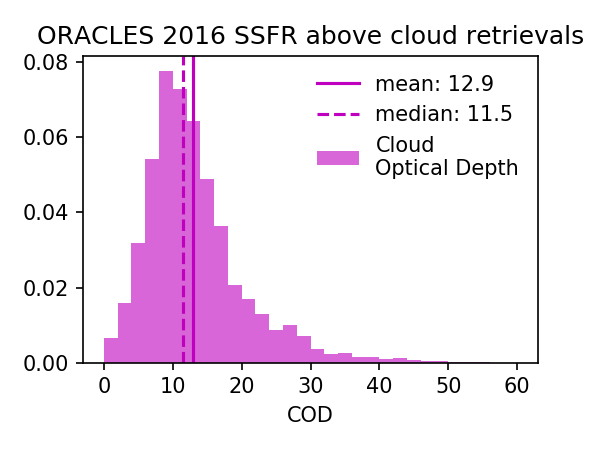

In [29]:
icod= s['cod']>0.0
plt.figure(figsize=(4,3))
#plt.hist(s['ref'],range=[0,60],bins=30,label='R$_{{eff}}$',alpha=0.6,normed=True,color='g')
plt.hist(s['cod'][icod],range=[0,60],bins=30,label='Cloud\nOptical Depth',alpha=0.6,normed=True,color='m')

#plt.axvline(np.nanmean(s['ref']),ls='-',color='g',label='mean')
#plt.axvline(np.nanmedian(s['ref']),ls='--',color='g',label='median')

plt.axvline(np.nanmean(s['cod'][icod]),ls='-',color='m',label='mean: {:3.1f}'.format(np.nanmean(s['cod'])))
plt.axvline(np.nanmedian(s['cod'][icod]),ls='--',color='m',label='median: {:3.1f}'.format(np.nanmedian(s['cod'])))
plt.legend(frameon=False)
plt.title('ORACLES 2016 SSFR above cloud retrievals')

plt.xlabel('COD')
plt.tight_layout()

plt.savefig(fp+'plot_DARE/ORACLES2016_COD_SSFR_hist_{}.png'.format(vv),dpi=600,transparent=True)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


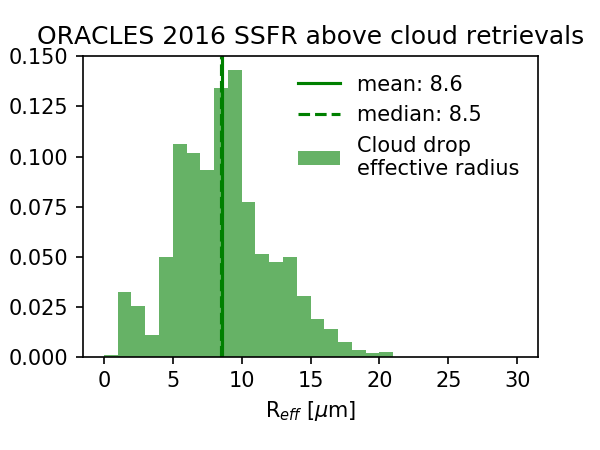

In [30]:
iref= s['ref']>0.0
plt.figure(figsize=(4,3))
plt.hist(s['ref'][iref],range=[0,30],bins=30,label='Cloud drop\neffective radius',alpha=0.6,normed=True,color='g')
#plt.hist(s['cod'][icod],range=[0,60],bins=30,label='COD',alpha=0.6,normed=True,color='m')

plt.axvline(np.nanmean(s['ref'][iref]),ls='-',color='g',label='mean: {:3.1f}'.format(np.nanmean(s['ref'])))
plt.axvline(np.nanmedian(s['ref'][iref]),ls='--',color='g',label='median: {:3.1f}'.format(np.nanmedian(s['ref'])))

#plt.axvline(np.nanmean(s['cod'][icod]),ls='-',color='m')
#plt.axvline(np.nanmedian(s['cod'][icod]),ls='--',color='m')
plt.legend(frameon=False)
plt.title('ORACLES 2016 SSFR above cloud retrievals')

plt.xlabel('R$_{{eff}}$ [$\mu$m]')
plt.tight_layout()

plt.savefig(fp+'plot_DARE/ORACLES2016_REF_SSFR_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [31]:
np.nanmean(s['cod']),np.nanmedian(s['cod'])

(12.897991057757089, 11.5)

In [32]:
np.nanmean(s['ref']),np.nanmedian(s['ref'])

(8.577984320450787, 8.5)

In [33]:
s['ssa'].shape

(27672, 7)

## Aerosol products

<IPython.core.display.Javascript object>


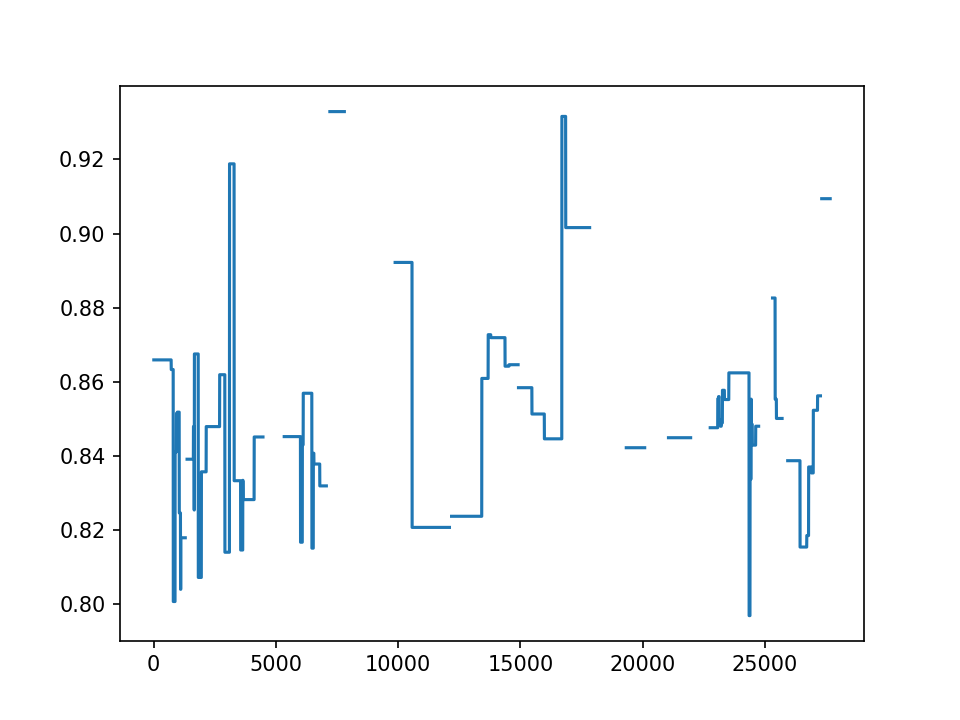

In [62]:
plt.figure()
plt.plot(s['ssa'][:,2])

<IPython.core.display.Javascript object>


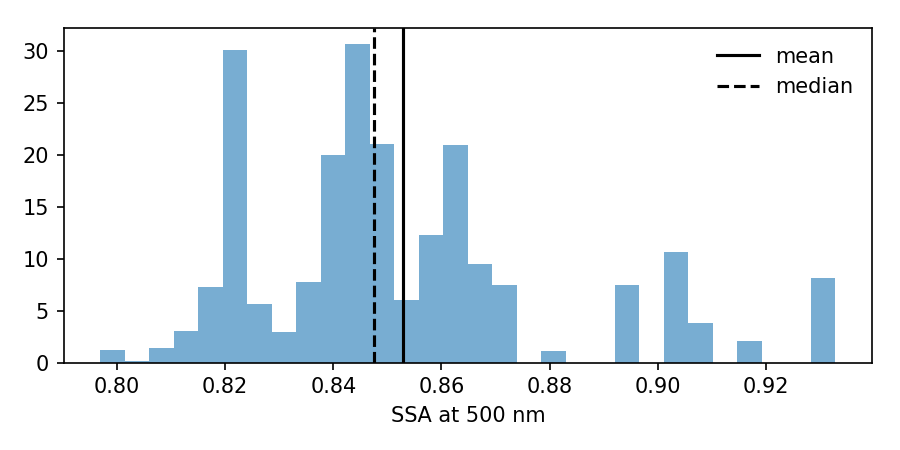

In [63]:
plt.figure(figsize=(6,3))
plt.hist(s['ssa'][:,2],bins=30,range=[np.nanmin(s['ssa'][:,2]),np.nanmax(s['ssa'][:,2])],normed=True,alpha=0.6)
plt.axvline(np.nanmean(s['ssa'][:,2]),ls='-',color='k',label='mean')
plt.axvline(np.nanmedian(s['ssa'][:,2]),ls='--',color='k',label='median')
plt.legend(frameon=False)
plt.xlabel('SSA at 500 nm')
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_SSA_500_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [64]:
np.nanmean(s['ssa'][:,2]),np.nanmedian(s['ssa'][:,2])

(0.8529735111417867, 0.8476)

<IPython.core.display.Javascript object>


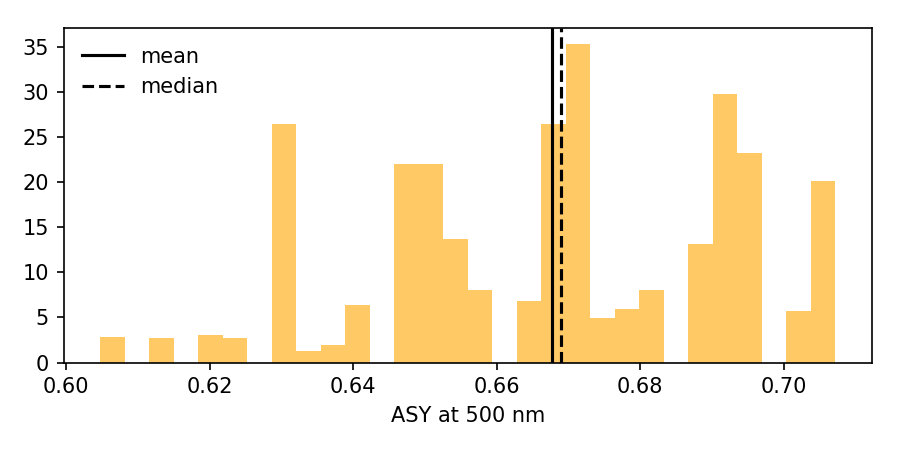

In [65]:
plt.figure(figsize=(6,3))
plt.hist(s['asy'][:,2],bins=30,range=[np.nanmin(s['asy'][:,2]),np.nanmax(s['asy'][:,2])],normed=True,alpha=0.6,color='orange')
plt.axvline(np.nanmean(s['asy'][:,2]),ls='-',color='k',label='mean')
plt.axvline(np.nanmedian(s['asy'][:,2]),ls='--',color='k',label='median')
plt.legend(frameon=False)
plt.xlabel('ASY at 500 nm')
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_ASY_500_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [33]:
s['wvl']

array([ 250.,  400.,  500.,  675.,  870.,  995., 4900.])

<IPython.core.display.Javascript object>


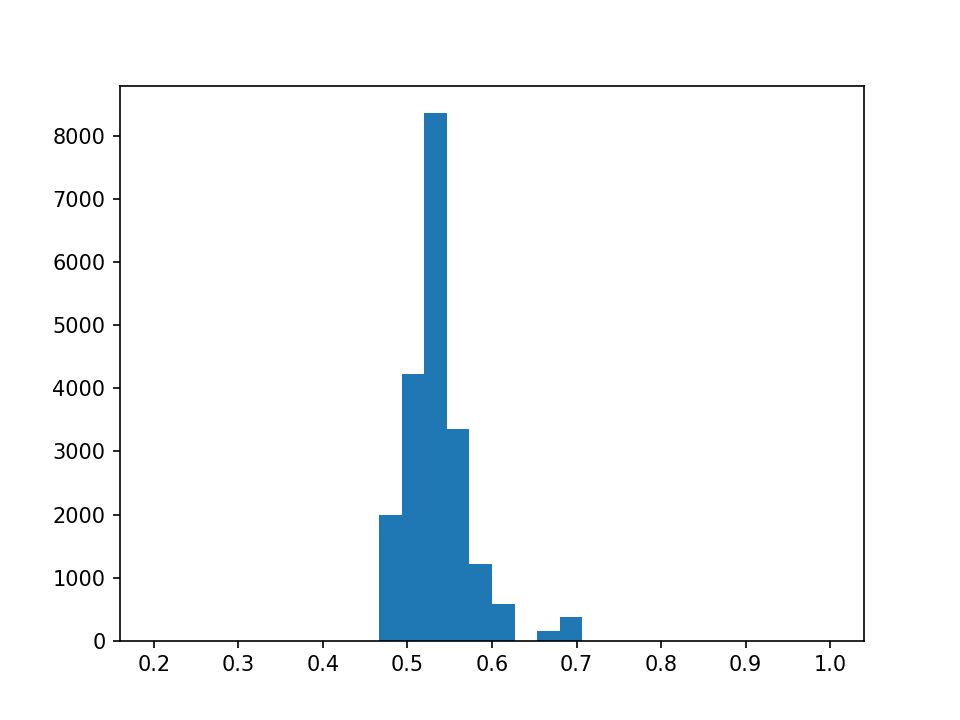

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1996., 4233., 8363., 3351., 1221.,  583.,    0.,  162.,
         375.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([0.2       , 0.22666667, 0.25333333, 0.28      , 0.30666667,
        0.33333333, 0.36      , 0.38666667, 0.41333333, 0.44      ,
        0.46666667, 0.49333333, 0.52      , 0.54666667, 0.57333333,
        0.6       , 0.62666667, 0.65333333, 0.68      , 0.70666667,
        0.73333333, 0.76      , 0.78666667, 0.81333333, 0.84      ,
        0.86666667, 0.89333333, 0.92      , 0.94666667, 0.97333333,
        1.        ]),
 <a list of 30 Patch objects>)

In [66]:
plt.figure()
plt.hist(s['asy'][:,5],range=[0.2,1],bins=30)

<IPython.core.display.Javascript object>


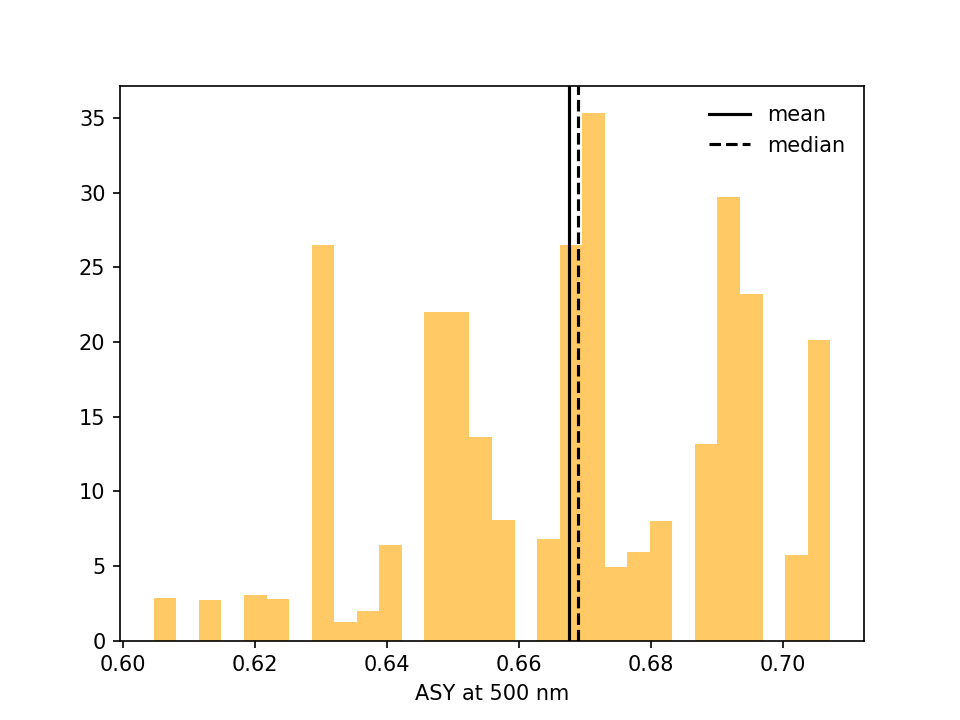

In [67]:
plt.figure()
plt.hist(s['asy'][:,2],bins=30,range=[np.nanmin(s['asy'][:,2]),np.nanmax(s['asy'][:,2])],normed=True,alpha=0.6,color='orange')
plt.axvline(np.nanmean(s['asy'][:,2]),ls='-',color='k',label='mean')
plt.axvline(np.nanmedian(s['asy'][:,2]),ls='--',color='k',label='median')
plt.legend(frameon=False)
plt.xlabel('ASY at 500 nm')
plt.savefig(fp+'plot_DARE/ORACLES2016_ASY_500_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [68]:
np.nanmean(s['asy'][:,2]),np.nanmedian(s['asy'][:,2])

(0.6676752830592833, 0.6690120678327507)

In [69]:
s['ext'].shape

(27672, 7)

In [70]:
s['wvl']

array([ 250.,  400.,  500.,  675.,  870.,  995., 4900.])

<IPython.core.display.Javascript object>


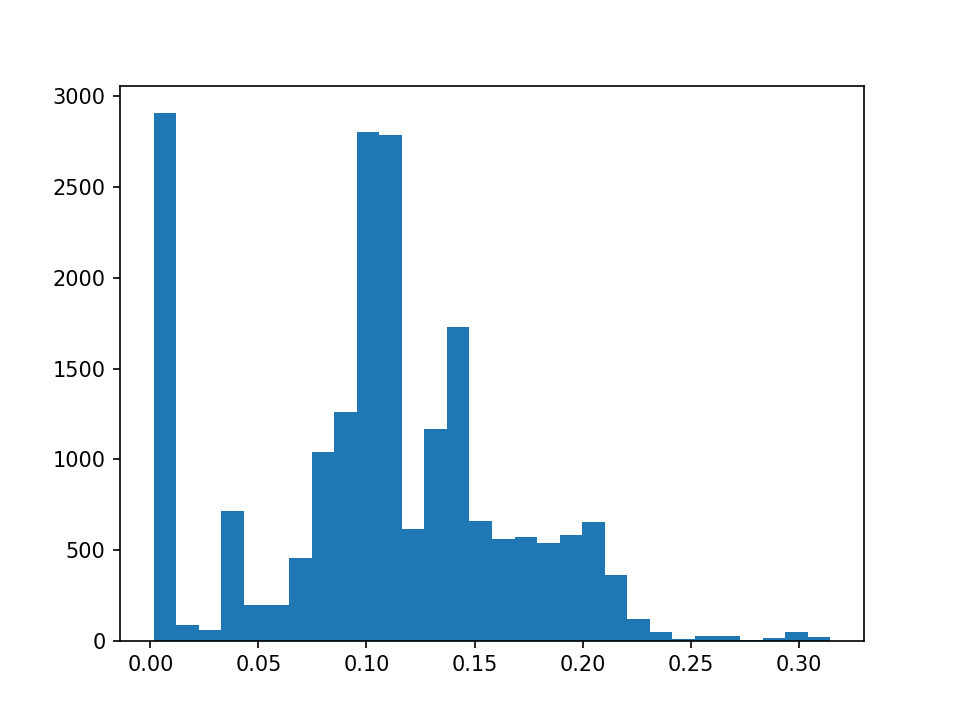

(array([2910.,   88.,   58.,  717.,  195.,  197.,  454., 1038., 1259.,
        2805., 2788.,  617., 1167., 1729.,  661.,  561.,  572.,  538.,
         583.,  657.,  361.,  122.,   51.,    9.,   28.,   26.,    7.,
          16.,   50.,   20.]),
 array([0.00157378, 0.01200849, 0.02244321, 0.03287793, 0.04331265,
        0.05374736, 0.06418208, 0.0746168 , 0.08505151, 0.09548623,
        0.10592095, 0.11635567, 0.12679038, 0.1372251 , 0.14765982,
        0.15809453, 0.16852925, 0.17896397, 0.18939869, 0.1998334 ,
        0.21026812, 0.22070284, 0.23113755, 0.24157227, 0.25200699,
        0.26244171, 0.27287642, 0.28331114, 0.29374586, 0.30418057,
        0.31461529]),
 <a list of 30 Patch objects>)

In [71]:
plt.figure()
plt.hist(s['ext'][:,2],range=[np.nanmin(s['ext'][:,2]),np.nanmax(s['ext'][:,2])],bins=30)

## DARE

In [97]:
s.keys()

[u'sza',
 u'lon',
 u'dn_avg',
 u'ref',
 u'dn',
 'dare_24h',
 u'asy',
 u'zout',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc',
 u'dn_noa',
 u'up_noa_avg',
 u'up',
 u'dare_avg',
 u'ext',
 u'doy',
 u'cod',
 u'dn_noa_avg',
 u'up_avg',
 u'up_noa']

<IPython.core.display.Javascript object>


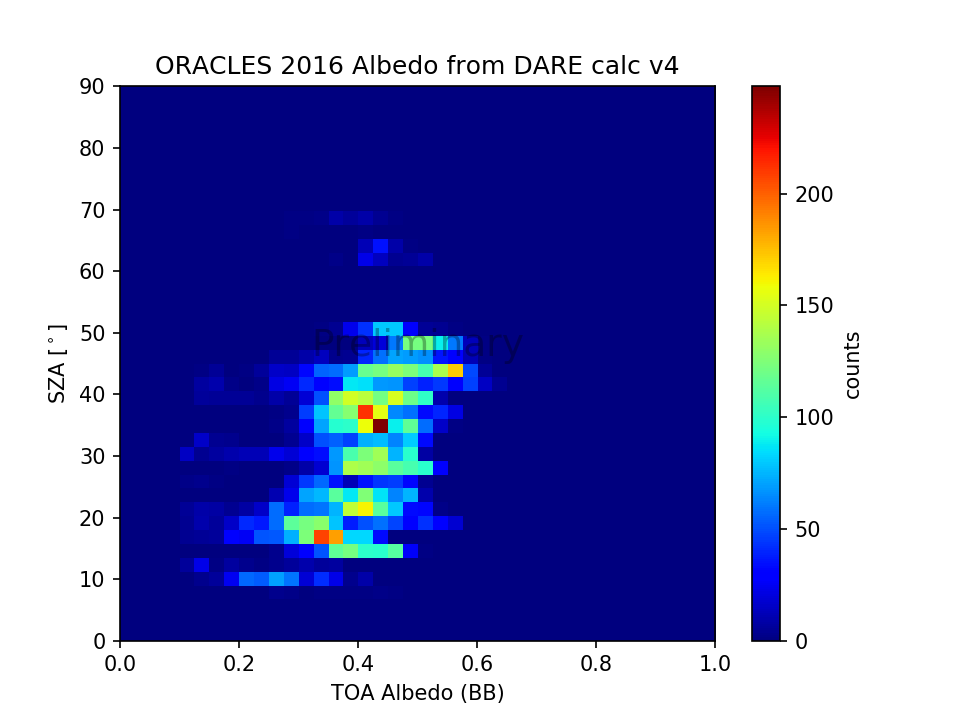

In [98]:
plt.figure()
plt.hist2d(s['up'][:,2]/s['dn'][:,2],s['sza'],bins=40,range=[[0,1],[0,90]],cmap=plt.cm.jet)
plt.ylabel('SZA [$^\\circ$]')
plt.xlabel('TOA Albedo (BB)')
plt.title('ORACLES 2016 Albedo from DARE calc {}'.format(vv))

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_albedo_from_calc_vs_SZA_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


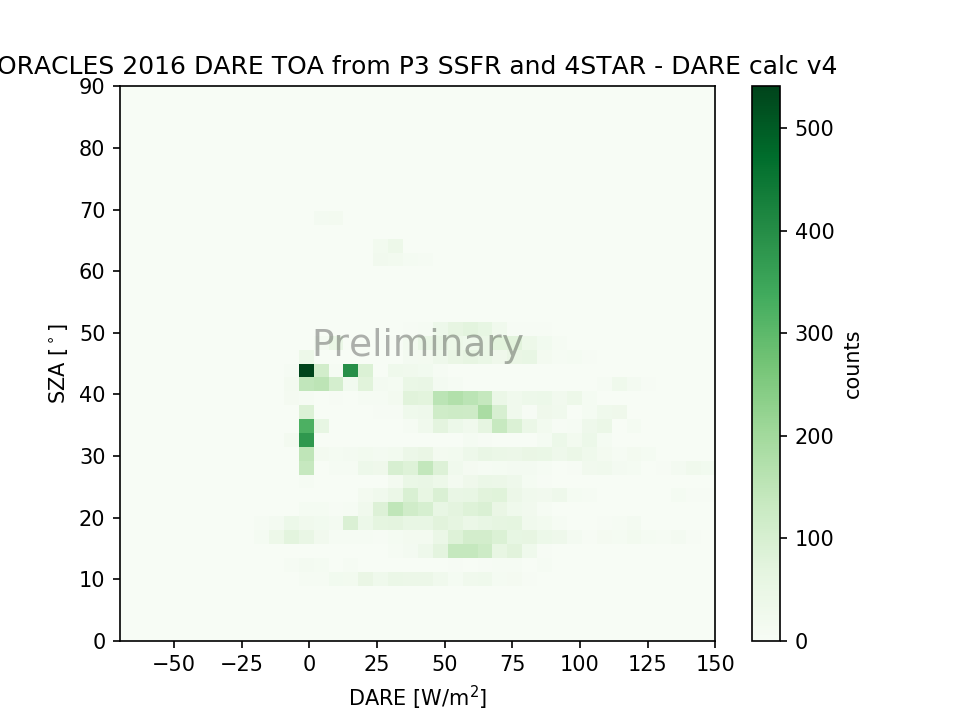

In [99]:
plt.figure()
plt.hist2d(s['dare'][:,2],s['sza'],bins=40,range=[[-70,150],[0,90]],cmap=plt.cm.Greens)
plt.ylabel('SZA [$^\\circ$]')
plt.xlabel('DARE [W/m$^2$]')
plt.title('ORACLES 2016 DARE TOA from P3 SSFR and 4STAR - DARE calc {}'.format(vv))

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_DARE_TOA_from_calc_vs_SZA_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


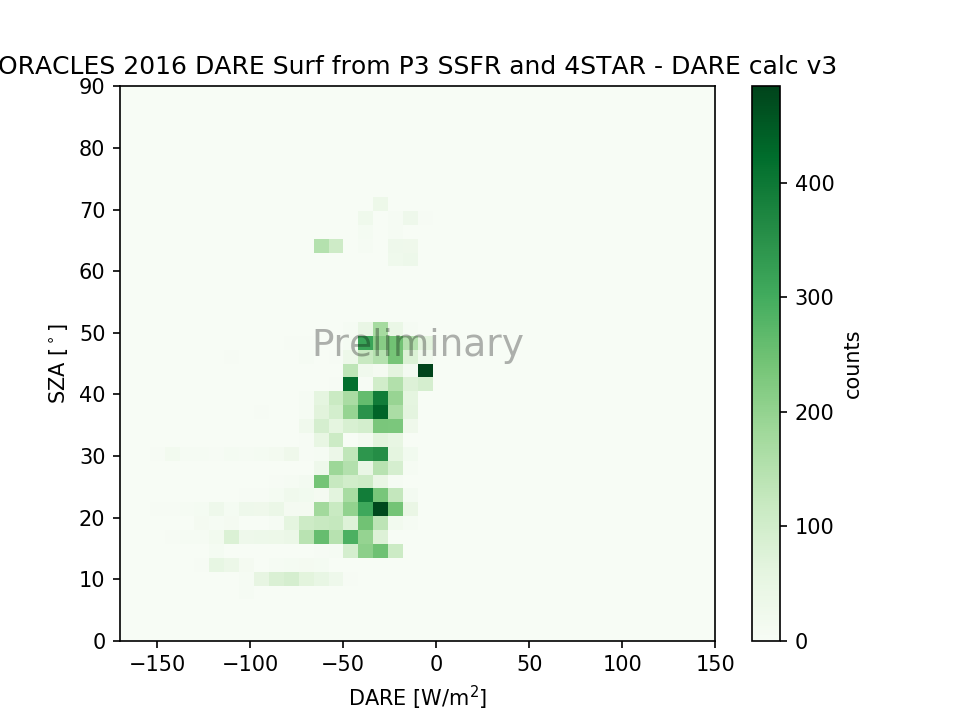

In [70]:
plt.figure()
plt.hist2d(s['dare'][:,0],s['sza'],bins=40,range=[[-170,150],[0,90]],cmap=plt.cm.Greens)
plt.ylabel('SZA [$^\\circ$]')
plt.xlabel('DARE [W/m$^2$]')
plt.title('ORACLES 2016 DARE Surf from P3 SSFR and 4STAR - DARE calc {}'.format(vv))

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_DARE_surf_from_calc_vs_SZA_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


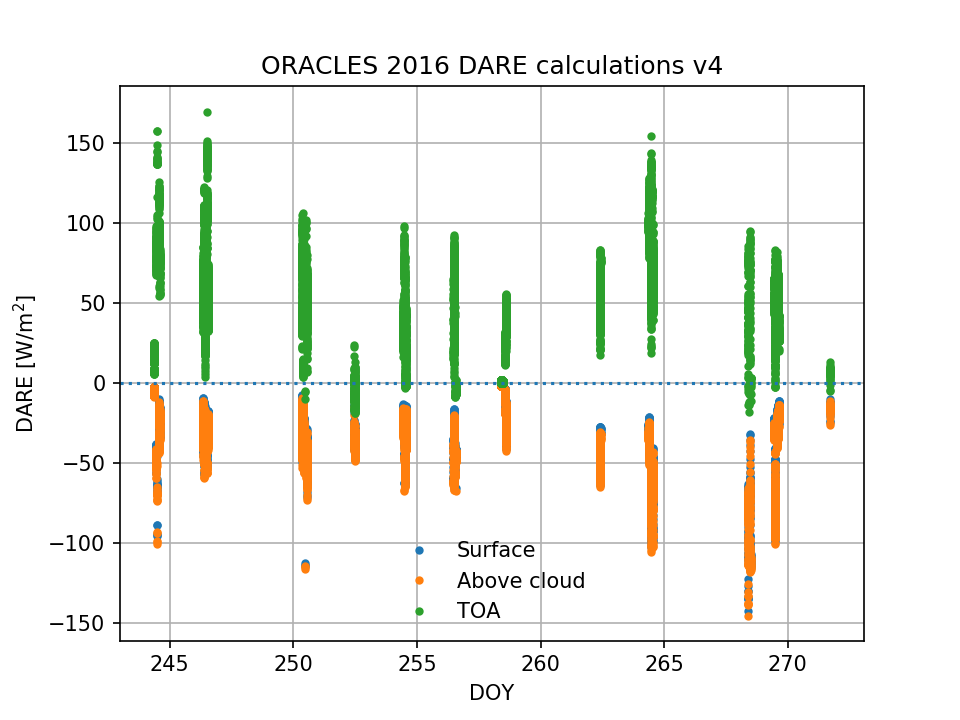

In [105]:
plt.figure()
plt.plot(s['doys'],s['dare'][:,0],'.',label='Surface')
plt.plot(s['doys'],s['dare'][:,1],'.',label='Above cloud')
plt.plot(s['doys'],s['dare'][:,2],'.',label='TOA')
plt.axhline(0,ls=':')
plt.legend(frameon=False)
plt.xlabel('DOY')
plt.ylabel('DARE [W/m$^{{2}}$]')
plt.title('ORACLES 2016 DARE calculations {}'.format(vv))
plt.grid()
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


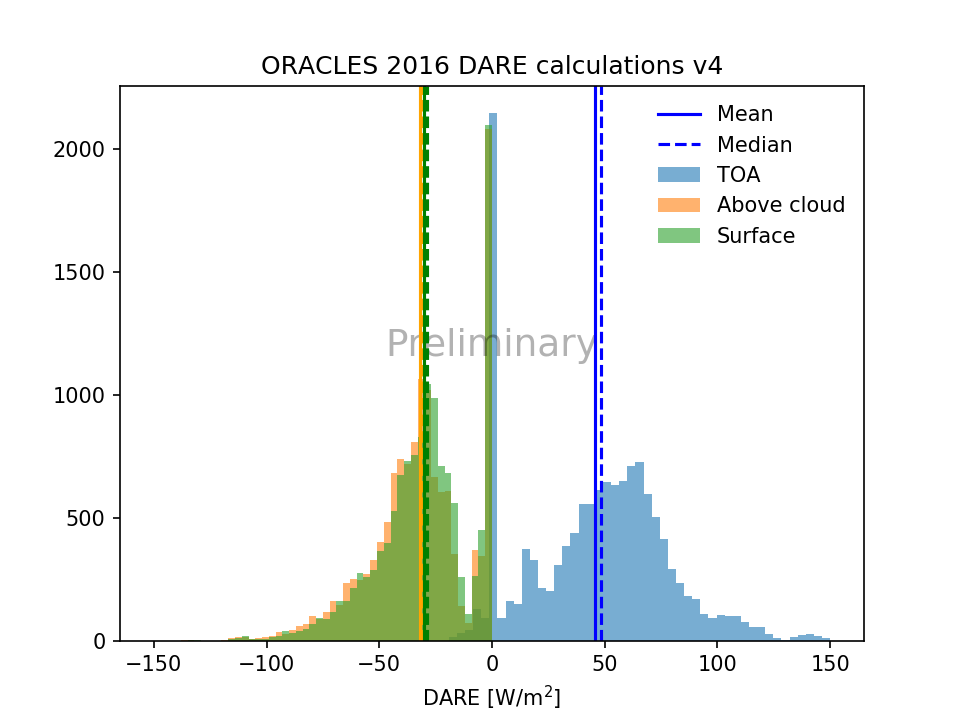

In [106]:
plt.figure()
plt.hist(s['dare'][:,2],range=[-30,150],bins=50,label='TOA',alpha=0.6)
plt.hist(s['dare'][:,1],range=[-150,0],bins=50,label='Above cloud',alpha=0.6)
plt.hist(s['dare'][:,0],range=[-150,0],bins=50,label='Surface',alpha=0.6)

plt.axvline(np.nanmean(s['dare'][:,2]),ls='-',color='b',label='Mean')
plt.axvline(np.nanmedian(s['dare'][:,2]),ls='--',color='b',label='Median')
plt.axvline(np.nanmean(s['dare'][:,1]),ls='-',color='orange')
plt.axvline(np.nanmedian(s['dare'][:,1]),ls='--',color='orange')
plt.axvline(np.nanmean(s['dare'][:,0]),ls='-',color='g')
plt.axvline(np.nanmedian(s['dare'][:,0]),ls='--',color='g')

pu.prelim()

plt.xlabel('DARE [W/m$^{{2}}$]')
plt.legend(frameon=False)

plt.title('ORACLES 2016 DARE calculations {}'.format(vv))
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_hist_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


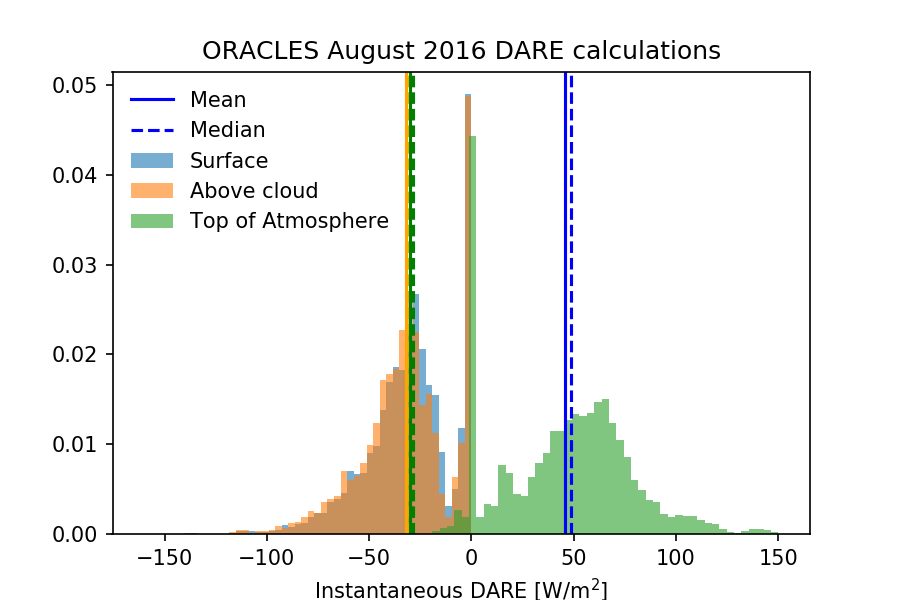

In [107]:
plt.figure(figsize=(6,4))

plt.hist(s['dare'][:,0],range=[-160,0],bins=50,label='Surface',alpha=0.6,normed=True)
plt.hist(s['dare'][:,1],range=[-160,0],bins=50,label='Above cloud',alpha=0.6,normed=True)
plt.hist(s['dare'][:,2],range=[-30,150],bins=50,label='Top of Atmosphere',alpha=0.6,normed=True)

plt.axvline(np.nanmean(s['dare'][:,2]),ls='-',color='b',label='Mean')
plt.axvline(np.nanmedian(s['dare'][:,2]),ls='--',color='b',label='Median')
plt.axvline(np.nanmean(s['dare'][:,1]),ls='-',color='orange')
plt.axvline(np.nanmedian(s['dare'][:,1]),ls='--',color='orange')
plt.axvline(np.nanmean(s['dare'][:,0]),ls='-',color='g')
plt.axvline(np.nanmedian(s['dare'][:,0]),ls='--',color='g')

#pu.prelim()

plt.xlabel('Instantaneous DARE [W/m$^{{2}}$]')
plt.legend(frameon=False,loc=2)

plt.title('ORACLES August 2016 DARE calculations')
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_normhist_{}.png'.format(vv),dpi=600,transparent=True)

In [108]:
sa['dare_px'].shape

(1, 27475)

<IPython.core.display.Javascript object>


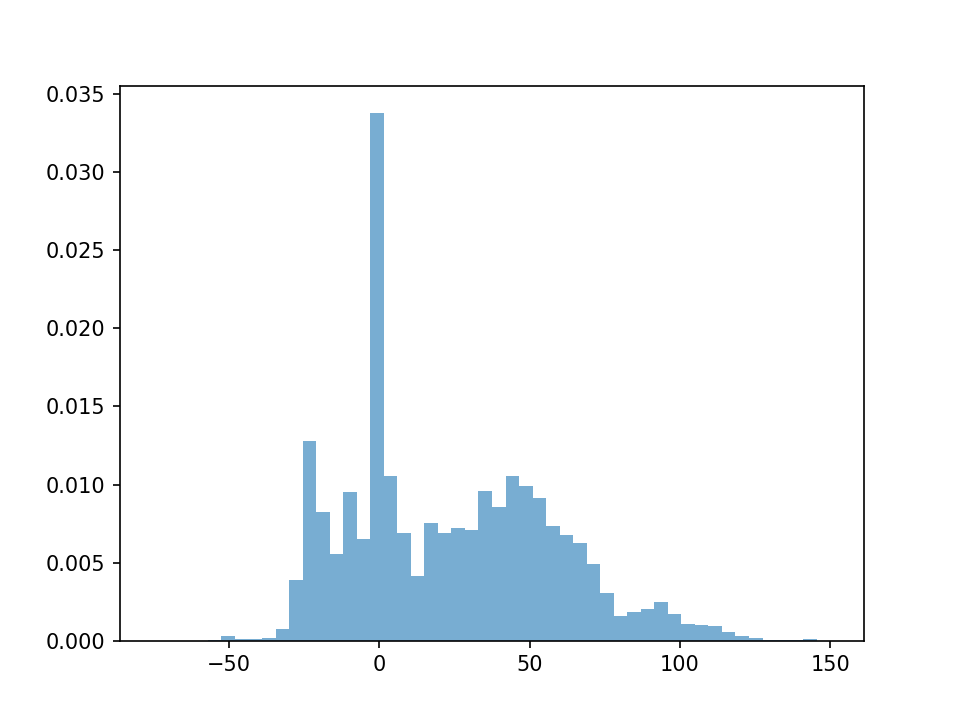

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.62466897e-05,
        6.49867589e-05, 3.00563760e-04, 1.13726828e-04, 8.93567936e-05,
        1.54343553e-04, 7.63594418e-04, 3.90732888e-03, 1.27780215e-02,
        8.22082501e-03, 5.58073792e-03, 9.52056019e-03, 6.48242921e-03,
        3.37849913e-02, 1.05603483e-02, 6.87234976e-03, 4.11853585e-03,
        7.52221735e-03, 6.91296648e-03, 7.24602362e-03, 7.11605010e-03,
        9.57742360e-03, 8.58637553e-03, 1.05765950e-02, 9.92672743e-03,
        9.13063963e-03, 7.32725707e-03, 6.77486962e-03, 6.23060551e-03,
        4.89025361e-03, 3.08687105e-03, 1.55968221e-03, 1.82775260e-03,
        2.02271287e-03, 2.49386687e-03, 1.72214911e-03, 1.10477490e-03,
        9.99171419e-04, 9.42308005e-04, 5.60510796e-04, 3.08687105e-04,
        1.62466897e-04, 6.49867589e-05, 4.06167243e-05, 8.12334487e-05,
        8.93567936e-05, 8.12334487e-06]),
 array([-75. , -70.5, -66. , -61.5, -57. , -52.5, -48. , -43.5, -39. ,
        -34.5, -30. , -

In [109]:
plt.figure()
plt.hist(sa['dare_p'][0,:],range=[-75,150],bins=50,label='Parameterisation, PX(Reflec.,AOD,SSA)',alpha=0.6,normed=True)

<IPython.core.display.Javascript object>


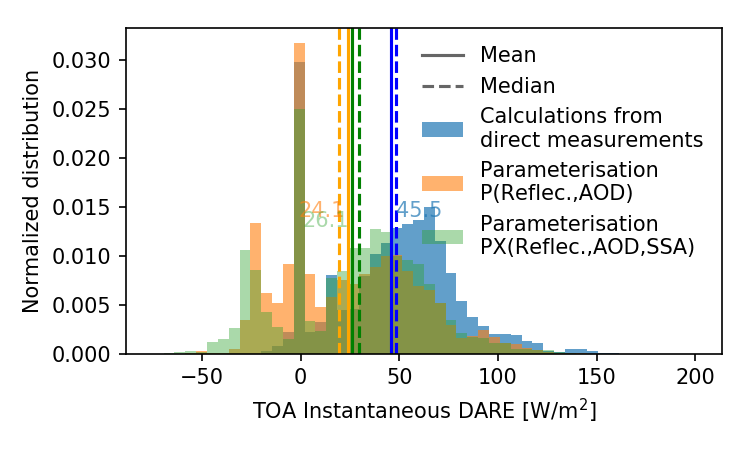

In [110]:
plt.figure(figsize=(5,3))
plt.hist(s['dare'][:,2],range=[-75,200],bins=50,label='Calculations from\ndirect measurements',alpha=0.7,normed=True)
plt.hist(sa['dare_p'][0,:],range=[-75,200],bins=50,label='Parameterisation\nP(Reflec.,AOD)',alpha=0.6,normed=True)
plt.hist(sa['dare_px'][0,:],range=[-75,200],bins=50,label='Parameterisation\nPX(Reflec.,AOD,SSA)',alpha=0.4,normed=True)

plt.plot([0,0],[0,0],ls='-',color='k',alpha=0.6,label='Mean')
plt.plot([0,0],[0,0],ls='--',color='k',alpha=0.6,label='Median')
plt.axvline(np.nanmean(s['dare'][:,2]),ls='-',color='b')
plt.axvline(np.nanmedian(s['dare'][:,2]),ls='--',color='b')
plt.axvline(np.nanmean(sa['dare_p'][0,:]),ls='-',color='orange')
plt.axvline(np.nanmedian(sa['dare_p'][0,:]),ls='--',color='orange')
plt.axvline(np.nanmean(sa['dare_px'][0,:]),ls='-',color='g')
plt.axvline(np.nanmedian(sa['dare_px'][0,:]),ls='--',color='g')

plt.text(np.nanmean(s['dare'][:,2])+3,0.014,'{:3.1f}'.format(np.nanmean(s['dare'][:,2])),color='tab:blue',alpha=0.7)
plt.text(np.nanmean(sa['dare_p'][0,:])-25,0.014,'{:3.1f}'.format(np.nanmean(sa['dare_p'][0,:])),color='tab:orange',alpha=0.6)
plt.text(np.nanmean(sa['dare_px'][0,:])-25,0.013,'{:3.1f}'.format(np.nanmean(sa['dare_px'][0,:])),color='tab:green',alpha=0.4)

plt.xlabel('TOA Instantaneous DARE [W/m$^{{2}}$]')
plt.ylabel('Normalized distribution')
#plt.grid()
plt.legend(frameon=False,loc=1)
plt.tight_layout()
plt.savefig(fp+'plot_DARE/DARE_TOA_hist_with_params_PX_{}.png'.format(vv),transparent=True,dpi=600)

In [111]:
igood = np.isfinite(s['dare'][:,0])

<IPython.core.display.Javascript object>


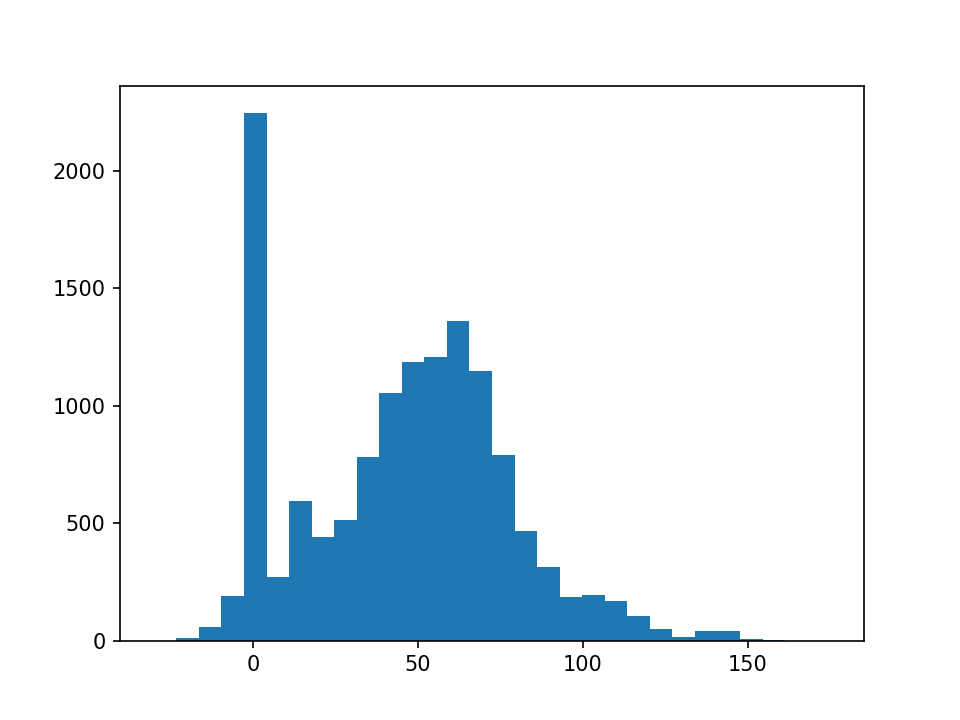

(array([0.000e+00, 1.200e+01, 5.900e+01, 1.890e+02, 2.246e+03, 2.710e+02,
        5.930e+02, 4.400e+02, 5.140e+02, 7.820e+02, 1.055e+03, 1.188e+03,
        1.206e+03, 1.361e+03, 1.149e+03, 7.920e+02, 4.660e+02, 3.160e+02,
        1.850e+02, 1.950e+02, 1.700e+02, 1.060e+02, 5.200e+01, 1.800e+01,
        4.100e+01, 4.300e+01, 7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([-30.        , -23.16666667, -16.33333333,  -9.5       ,
         -2.66666667,   4.16666667,  11.        ,  17.83333333,
         24.66666667,  31.5       ,  38.33333333,  45.16666667,
         52.        ,  58.83333333,  65.66666667,  72.5       ,
         79.33333333,  86.16666667,  93.        ,  99.83333333,
        106.66666667, 113.5       , 120.33333333, 127.16666667,
        134.        , 140.83333333, 147.66666667, 154.5       ,
        161.33333333, 168.16666667, 175.        ]),
 <a list of 30 Patch objects>)

In [112]:
plt.figure()
plt.hist(s['dare'][igood,2],bins=30,range=[-30,175])

In [76]:
np.nanmean(s['dare'][igood,2]),np.nanmedian(s['dare'][igood,2]),np.nanstd(s['dare'][igood,2])

(35.20286981190554, 37.67169858943501, 33.42427106567774)

## Make the boxes

The observations and model data are aggregated within horizontal domains of at least 2o by 2o indicated in Fig. 2. One of the three main regions encompasses the routine flight track, with individual grid boxes centered at (14oE, 24oS), (12oE, 22oS), (10oE, 20oS), (8oE, 18oS), (6oE, 16oS), (4oE, 14oS), (2oE, 12oS) and (0oE, 10oS). Another more coastal north-south track has the southernmost grid box centered on 22oS, spanning between 9oE and 11.75oE. Seven grid boxes are located every 2 degrees north of this, with the northernmost grid box centered on 8oS. A third, zonal track covers the larger domain of the ER2 measurements, with individual grid boxes spanning latitudinally between 10oS and 6oS and separated longitudinally at two degree intervals beginning at 3oW to the west and 13oE in the east. The box for St. Helena Island spans between 6.72 oW and 4.72 oW, between 16.933 oS and 14.933 oS.

In [113]:
boxes_diag = []
boxes_ns = []
boxes_ew = []

In [114]:
boxes_diag_ct = [[14.0,-24.0], [12.0,-22.0],[10.0,-20.0],[8.0,-18.0],[6.0,-16.0],[4.0,-14.0],[2.0,-12.0],[0.0,-10.0]]
boxes_ns_ct = [[10.5,-22.0],[10.5,-20.0],[10.5,-18.0],[10.5,-16.0],[10.5,-14.0],[10.5,-12.0],[10.5,-10.0],[10.5,-8.0]]
boxes_ew_ct = [[-3.0,-8.0],[-1.0,-8.0],[1.0,-8.0],[3.0,-8.0],[5.0,-8.0],[7.0,-8.0],[9.0,-8.0],[11.0,-8.0],[13.0,-8.0]]

Corners are [x0,x1,y0,y1]

In [115]:
boxes_ns = [[9.0,11.75,i[1]-1.0,i[1]+1.0] for i in boxes_ns_ct]

In [116]:
boxes_ew = [[-10.0,-6.0,i[0]-1.0,i[0]+1.0] for i in boxes_ew_ct]

In [117]:
boxes_diag = [[i[0]-1.0,i[0]+1,i[1]-1.0,i[1]+1.0] for i in boxes_diag_ct]

In [118]:
boxes_diag

[[13.0, 15.0, -25.0, -23.0],
 [11.0, 13.0, -23.0, -21.0],
 [9.0, 11.0, -21.0, -19.0],
 [7.0, 9.0, -19.0, -17.0],
 [5.0, 7.0, -17.0, -15.0],
 [3.0, 5.0, -15.0, -13.0],
 [1.0, 3.0, -13.0, -11.0],
 [-1.0, 1.0, -11.0, -9.0]]

In [119]:
boxes_ew

[[-10.0, -6.0, -4.0, -2.0],
 [-10.0, -6.0, -2.0, 0.0],
 [-10.0, -6.0, 0.0, 2.0],
 [-10.0, -6.0, 2.0, 4.0],
 [-10.0, -6.0, 4.0, 6.0],
 [-10.0, -6.0, 6.0, 8.0],
 [-10.0, -6.0, 8.0, 10.0],
 [-10.0, -6.0, 10.0, 12.0],
 [-10.0, -6.0, 12.0, 14.0]]

In [120]:
boxes_ns

[[9.0, 11.75, -23.0, -21.0],
 [9.0, 11.75, -21.0, -19.0],
 [9.0, 11.75, -19.0, -17.0],
 [9.0, 11.75, -17.0, -15.0],
 [9.0, 11.75, -15.0, -13.0],
 [9.0, 11.75, -13.0, -11.0],
 [9.0, 11.75, -11.0, -9.0],
 [9.0, 11.75, -9.0, -7.0]]

In [121]:
bins_diag = []
for i,b in enumerate(boxes_diag):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare'][igood,2]))
    bins_diag.append(s['dare'][igood,2][ia])

In [122]:
bins_diag[0] = bins_diag[1][0:5]

In [123]:
bins_ns,bins_ns_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare'][igood,2]))
    bins_ns.append(s['dare'][igood,2][ia])
    bins_ns_num.append(len(s['dare'][igood,2][ia]))

In [124]:
bins_ns[-1] = bins_ns[-2][0:5]

In [125]:
bins_ew = []
for i,b in enumerate(boxes_ew):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare'][igood,2]))
    bins_ew.append(s['dare'][igood,2][ia])

In [128]:
len(boxes_diag),len(bins_diag)

(8, 8)

<IPython.core.display.Javascript object>


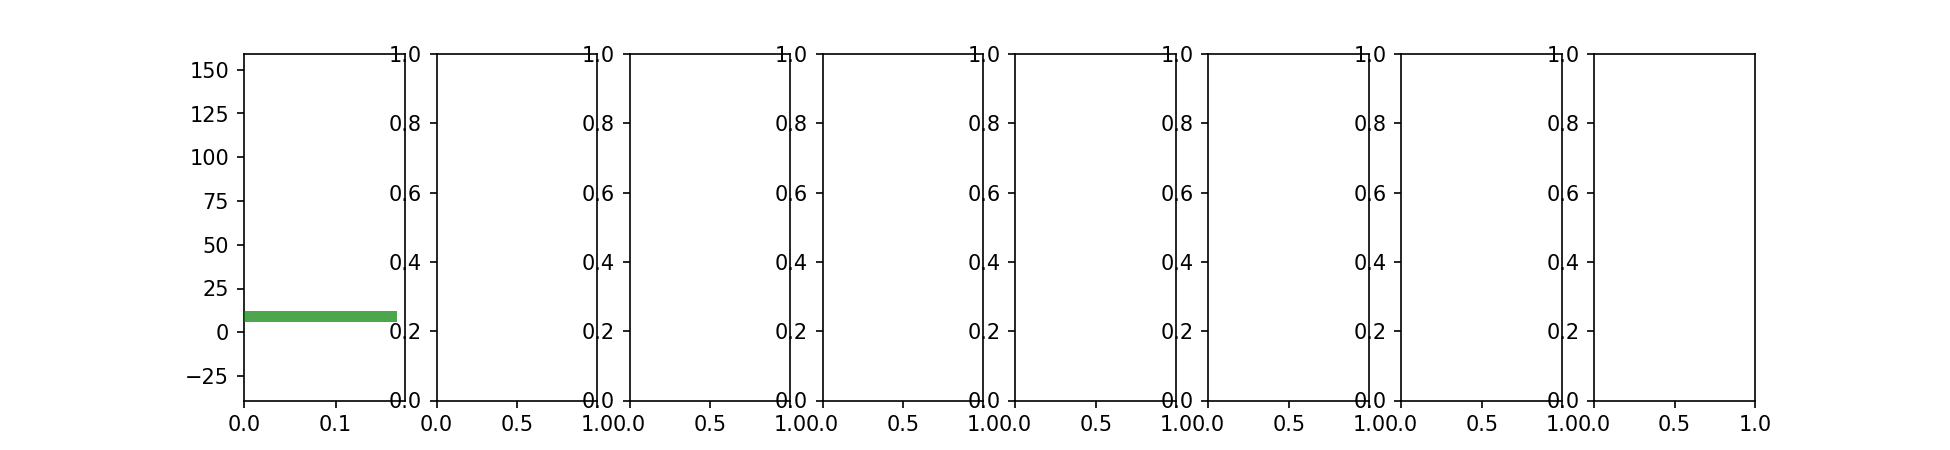

KeyError: 'bins_diag'

In [129]:
[fig,ax] = plt.subplots(1,8,figsize=(13,3))

for i,b in enumerate(boxes_diag_ct):
    ax[i].hist(bins_diag[i],bins=30,edgecolor='None',alpha=0.7,color='g',range=(-30,150),
               zorder=10,normed=True,orientation='horizontal',label='Calc')
    ax[i].hist(sa['bins_diag'][0,i][0],bins=30,edgecolor='None',alpha=0.3,color='m',range=(-30,150),
               zorder=-1,normed=True,orientation='horizontal',label='Param')
    ax[i].axhline(np.nanmean(bins_diag[i]),color='g')#,label='mean')
    ax[i].axhline(np.nanmedian(bins_diag[i]),color='g',linestyle='--')#,label='median')
    xmin, xmax = ax[i].get_xlim()
    ax[i].set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    if i>0:
        [ag.set_visible(False) for ag in ax[i].yaxis.get_ticklabels()]
    if i==0:
        ax[i].legend(frameon=False,bbox_to_anchor=[0.08, 0.85])
    ax[i].set_title('{}$^\\circ$ ,{}$^\\circ$'.format(b[0],b[1]))
    ax[i].axhline(0,ls=':',color='k',alpha=0.2)
    #if i%2: pu.prelim(ax[i])
ax[0].set_ylabel('DARE [W/m$^2$]')
fig.suptitle('ORACLES 2016 Routine Diagonal (Lon,Lat) - TOA {}'.format(vv))
fig.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_TOA_calc_diag_boxes_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


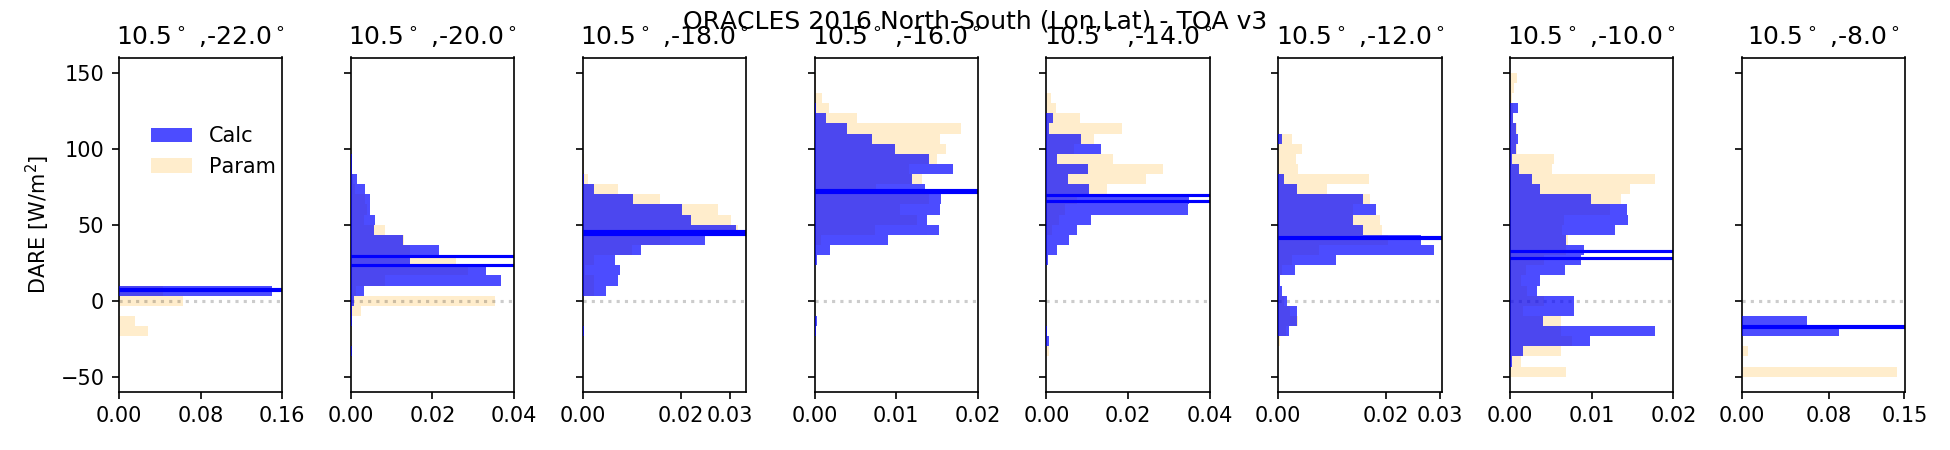

In [94]:
[fig,ax] = plt.subplots(1,8,figsize=(13,3))

for i,b in enumerate(boxes_ns_ct):
    ax[i].hist(bins_ns[i],bins=30,edgecolor='None',alpha=0.7,color='b',range=(-50,150),zorder=10,normed=True,orientation='horizontal',label='Calc')
    ax[i].hist(sa['bins_ns'][0,i][0],bins=30,edgecolor='None',alpha=0.2,color='orange',range=(-50,150),zorder=-1,normed=True,orientation='horizontal',label='Param')
    ax[i].axhline(np.nanmean(bins_ns[i]),color='b')#,label='mean')
    ax[i].axhline(np.nanmedian(bins_ns[i]),color='b')#,linestyle='--',label='median')
    xmin, xmax = ax[i].get_xlim()
    ax[i].set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    if i>0:
        [ag.set_visible(False) for ag in ax[i].yaxis.get_ticklabels()]
    else:
        ax[i].legend(frameon=False,bbox_to_anchor=[0.08,0.85])
    ax[i].set_title('{}$^\\circ$ ,{}$^\\circ$'.format(b[0],b[1]))
    ax[i].axhline(0,ls=':',color='k',alpha=0.2)
    #if i%2: pu.prelim(ax[i])
ax[0].set_ylabel('DARE [W/m$^2$]')
fig.suptitle('ORACLES 2016 North-South (Lon,Lat) - TOA {}'.format(vv))
fig.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_TOA_calc_ns_boxes_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


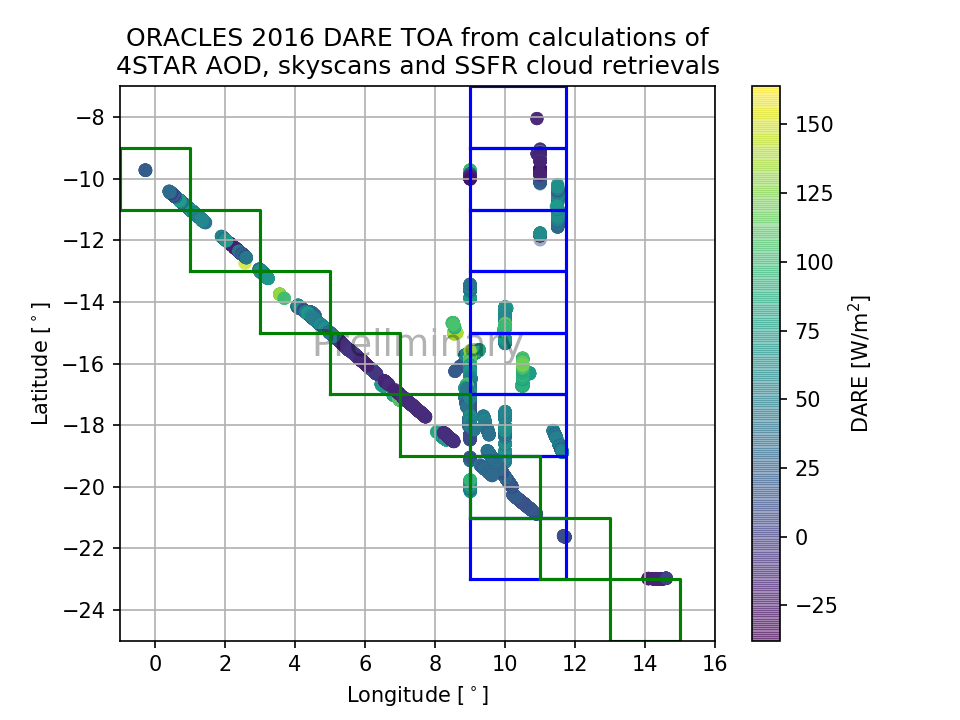

In [93]:
plt.figure()
sca = plt.scatter(s['lon'][igood],s['lat'][igood],c=s['dare'][igood,2],edgecolor='None',s=40,alpha=0.5,cmap=plt.cm.viridis)
plt.grid()
plt.xlim(-1,16)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('Latitude [$^\\circ$]')
cb = plt.colorbar(sca)
cb.set_label('DARE [W/m$^2$]')
pu.prelim()

for i,b in enumerate(boxes_ns): 
    plt.plot([b[0],b[0],b[1],b[1],b[0]],[b[2],b[3],b[3],b[2],b[2]],'-b')
for i,b in enumerate(boxes_diag): 
    plt.plot([b[0],b[0],b[1],b[1],b[0]],[b[2],b[3],b[3],b[2],b[2]],'-g')

plt.ylim(-25,-7)
plt.title('ORACLES 2016 DARE TOA from calculations of\n4STAR AOD, skyscans and SSFR cloud retrievals')
plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_TOA_calc_map_param_{}.png'.format(vv),dpi=600,transparent=True)

## Put into box-whisker plots

In [132]:
ns_ct = np.array(boxes_ns_ct)

In [133]:
ns_ct[:,1]

array([-22., -20., -18., -16., -14., -12., -10.,  -8.])

In [134]:
def color_boxes(bp,color):
    for b in bp['boxes']:
        b.set_facecolor(color)
        b.set_edgecolor(color)
        b.set_alpha(0.4)
    for b in bp['means']:
        b.set_marker('o')
        b.set_color('firebrick')
        b.set_markerfacecolor(color)
        b.set_markeredgecolor(color)
        b.set_alpha(0.4)
    for b in bp['whiskers']:
        b.set_linestyle('-')
        b.set_color(color)
        b.set_alpha(0.4)
    for b in bp['caps']:
        b.set_alpha(0.4)
        b.set_color(color)
    for b in bp['medians']:
        b.set_linewidth(4)
        b.set_color('gold')
        b.set_alpha(0.4)
    for b in bp['fliers']:
        b.set_marker('.')
        b.set_markeredgecolor('None')
        b.set_markerfacecolor('lightgrey')
        b.set_alpha(0.5)

<IPython.core.display.Javascript object>


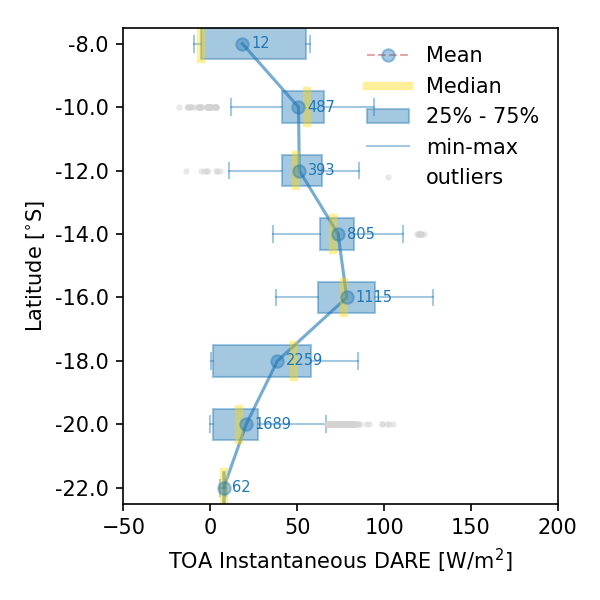

In [136]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('TOA Instantaneous DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
plt.xlim(-50,200)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')


plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
           ['Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=1,numpoints=1)
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_boxplot_NS_lat_{}.png'.format(vv),dpi=600,transparent=True)

In [250]:
sa.keys()

['bins_ew_px',
 'boxes_ew_ct',
 'sza',
 'boxes_ns_ct',
 'bins_diag_p',
 'boxes_ns',
 'lon',
 '__version__',
 'boxes_ew',
 'bins_ns_p',
 'boxes_diag',
 'dare_p',
 'lat',
 'bins_ew_p',
 'utc',
 'bins_diag_px',
 'bins_ns_px',
 '__header__',
 '__globals__',
 'boxes_diag_ct',
 'doy',
 'dare_px']

<IPython.core.display.Javascript object>


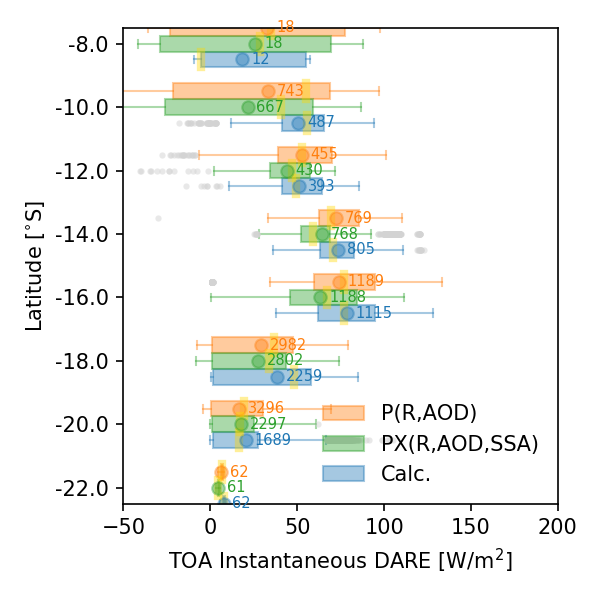

In [137]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns,positions=ns_ct[:,1]-0.5,vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)

bpp = plt.boxplot(sa['bins_ns_p'][0],positions=ns_ct[:,1]+0.5,vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)
bpx = plt.boxplot(sa['bins_ns_px'][0],positions=ns_ct[:,1],vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)


plt.xlabel('TOA Instantaneous DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

color_boxes(bp,'tab:blue')
color_boxes(bpp,'tab:orange')
color_boxes(bpx,'tab:green')

#dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
#plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Calc.')
#dare_means_p = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bpp['means']])
#plt.plot(dare_means_p[:,0],dare_means_p[:,1],'-',color='tab:orange',alpha=0.6,label='P(R,AOD)')
#dare_means_px = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bpx['means']])
#plt.plot(dare_means_px[:,0],dare_means_px[:,1],'-',color='tab:green',alpha=0.6,label='PX(R,AOD,SSA)')

for j,nn in enumerate(bins_ns_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1]-0.5,'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')
for j,nn in enumerate(sa['bins_ns_p'][0]):
    if len(nn)>0:
        plt.text(min(bpp['means'][j].get_data()[0])+5,ns_ct[j,1]+0.5,'{:2.0f}'.format(len(nn[0])),
         color='tab:orange',fontsize=7,verticalalignment='center',horizontalalignment='left')
for j,nn in enumerate(sa['bins_ns_px'][0]):
    if len(nn)>0:
        plt.text(min(bpx['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(len(nn[0])),
         color='tab:green',fontsize=7,verticalalignment='center',horizontalalignment='left')

plt.xlim(-50,200)
plt.legend([bpp['boxes'][0],bpx['boxes'][0],bp['boxes'][0]],['P(R,AOD)','PX(R,AOD,SSA)','Calc.'],frameon=False,loc=4,numpoints=1)
#plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
#           ['Mean','Median','25% - 75%','min-max','outliers'],
#           frameon=False,loc=1,numpoints=1)
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_boxplot_NS_lat_withParams_{}.png'.format(vv),dpi=600,transparent=True)

In [138]:
sa['bins_ns_px'][0]

array([array([[4.18874858, 4.2096337 , 4.19143313, 4.14105662, 3.97785698,
        3.72181546, 3.53146076, 3.16515289, 3.10004583, 3.11989018,
        3.14469606, 3.22997871, 3.05922235, 3.18116627, 3.36208142,
        3.63985443, 3.76072978, 3.80575925, 4.1836696 , 4.37487398,
        4.53791517, 4.63795848, 4.54645133, 4.34358351, 4.49414241,
        4.63729481, 4.65467299, 4.7835603 , 4.74440595, 4.71397246,
        4.74430686, 4.6142939 , 4.46851683, 4.51592538, 4.73347299,
        4.91926775, 4.84852857, 4.94592382, 4.98065532, 4.96765493,
        5.10533202, 5.1256318 , 5.27598211, 5.06144996, 4.75264082,
        4.86190788, 5.12107087, 5.57123997, 5.19877344, 4.71078949,
        5.0810741 , 5.30329208, 5.29111023, 5.15640279, 5.29579563,
        5.20392815, 5.17223784, 5.27130766, 5.44331022, 4.5961568 ,
        4.96985262]]),
       array([[14.50946407, 14.52569825, 14.71050357, ..., 16.7988688 ,
        16.71091783, 17.81063909]]),
       array([[39.87033621, 42.04416064, 40.7

## Make the box-whisker plots for 24h DARE

In [139]:
np.nanmean(s['dare_24h'][:,2]),np.nanstd(s['dare_24h'][:,2])

(26.04875440777653, 18.229346200467216)

In [140]:
bins_ns_24,bins_ns_24_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare_24h'][igood,2]))
    bins_ns_24.append(s['dare_24h'][igood,2][ia])
    bins_ns_24_num.append(len(s['dare_24h'][igood,2][ia]))

In [141]:
bins_ns_24h,bins_ns_24h_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (sh['lon']>= b[0]) & (sh['lon']<=b[1]) &(sh['lat']>=b[2]) &\
    (sh['lat']<=b[3]) & (np.isfinite(sh['dare_avg'][:,2]))
    bins_ns_24h.append(sh['dare_avg'][:,2][ia])
    bins_ns_24h_num.append(len(sh['dare_avg'][:,2][ia]))

<IPython.core.display.Javascript object>


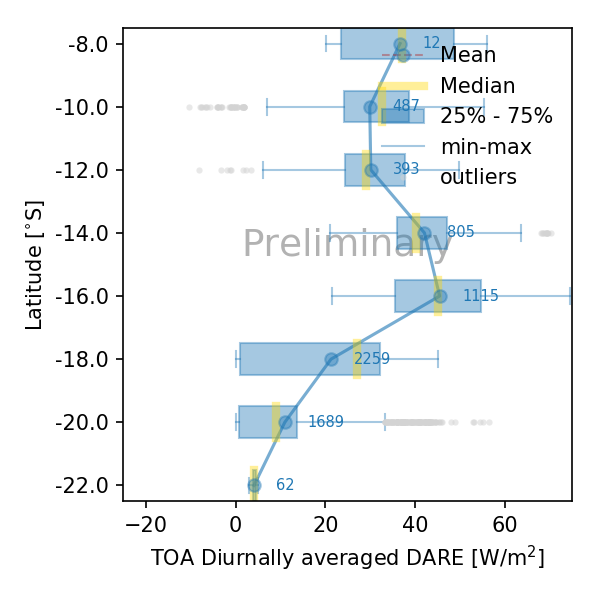

In [142]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_24,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
plt.xlim(-25,75)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')
pu.prelim()

plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
           ['Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=1,numpoints=1)
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_boxplot_NS_lat_{}.png'.format(vv),dpi=600,transparent=True)

In [487]:
np.nanmean(sh['dare_avg'][:,2]),np.nanstd(sh['dare_avg'][:,2])

(10.322343002916925, 12.28948673526183)

<IPython.core.display.Javascript object>


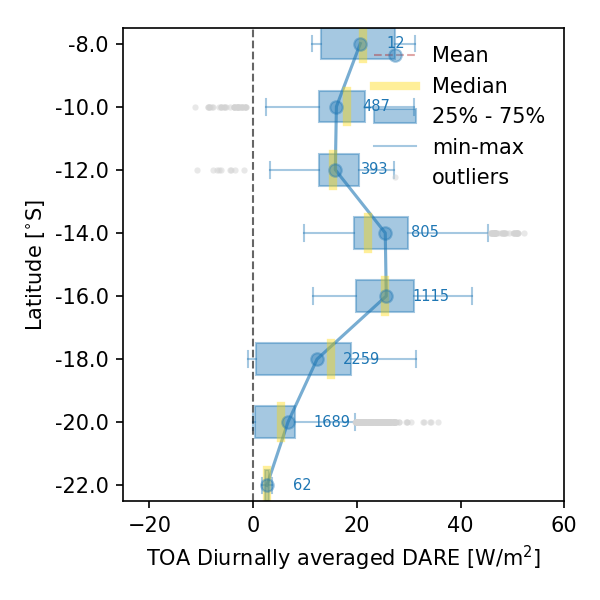

In [143]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_24h,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
plt.xlim(-25,60)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')
#pu.prelim()
plt.axvline(0,ls='--',lw=1,color='k',alpha=0.6)

plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
           ['Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=1,numpoints=1)
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_from_calc_boxplot_NS_lat_{}.png'.format(vv),dpi=600,transparent=True)

In [145]:
dare_means

array([[  2.65588138, -22.        ],
       [  6.71316607, -20.        ],
       [ 12.32889995, -18.        ],
       [ 25.67348847, -16.        ],
       [ 25.48009354, -14.        ],
       [ 15.84949092, -12.        ],
       [ 16.06073848, -10.        ],
       [ 20.67146911,  -8.        ]])

In [146]:
np.arange(0,-22,-2)

array([  0,  -2,  -4,  -6,  -8, -10, -12, -14, -16, -18, -20])

<IPython.core.display.Javascript object>


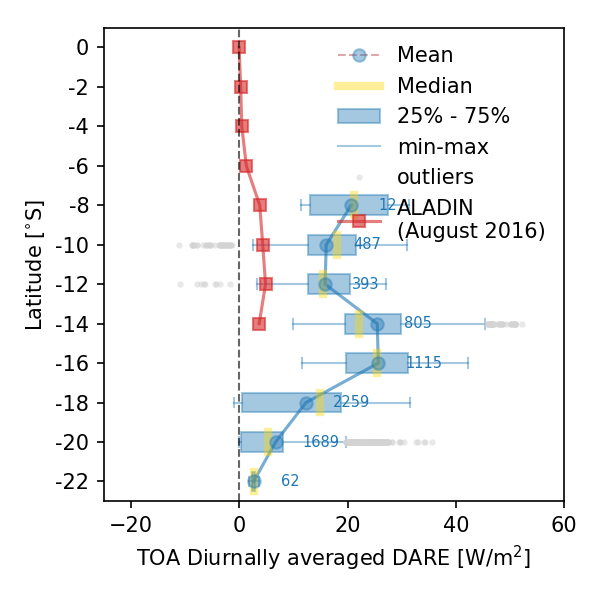

In [147]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_24h,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
la = plt.plot(AL_dare_2016, AL_Lat,'s-',color='tab:red',alpha=0.6,label='ALADIN Model')
plt.ylim(-23,1)
plt.yticks(np.arange(-22,2,2))
plt.gca().set_yticklabels(np.arange(-22,2,2))
#plt.yticks([-22.0-20.0,-18.0,-16.0,-14.0,-12.0,-10.0,-8.0,-6.0,-4.0,-2.0])
plt.xlim(-25,60)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')
#pu.prelim()
plt.axvline(0,ls='--',lw=1,color='k',alpha=0.6)

plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0],la[0]],
           ['Mean','Median','25% - 75%','min-max','outliers','ALADIN\n(August 2016)'],
           frameon=False,loc=1,numpoints=1)
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_from_calc_with_ALADIN_boxplot_NS_lat_{}.png'.format(vv),dpi=600,transparent=True)

In [299]:
sunf = lambda x: np.cos(np.deg2rad(x)) if np.cos(np.deg2rad(x))>=0 else 0.0

In [301]:
u = np.cos(np.radians(np.arange(-180,180)))

In [302]:
u[u<0] = 0.0

In [304]:
u/np.mean(u)

0.318301805914749

<IPython.core.display.Javascript object>


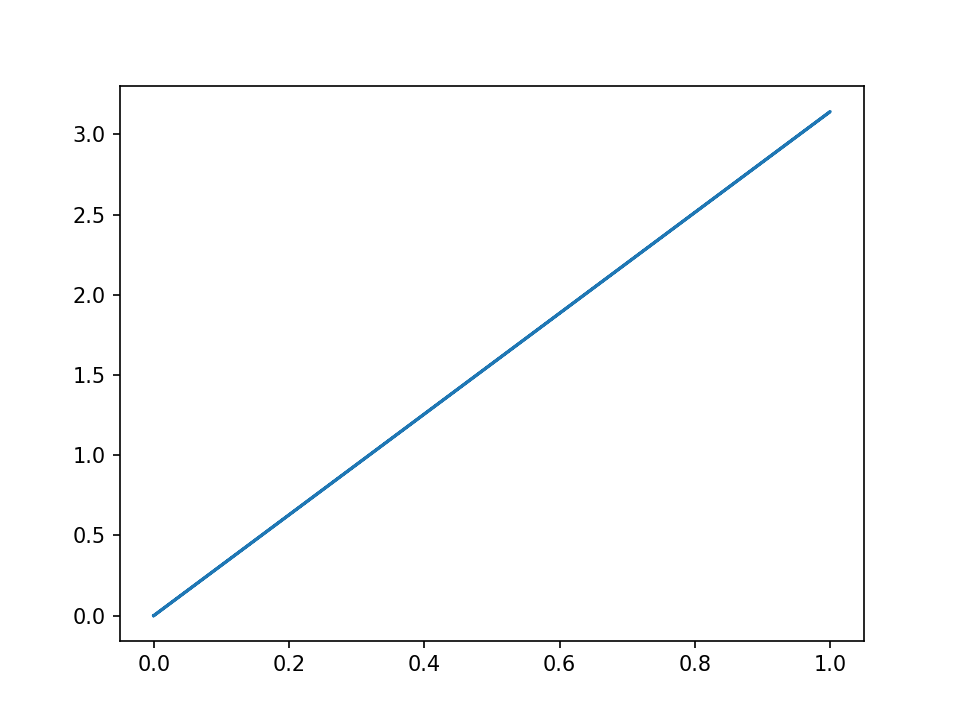

In [306]:
plt.figure()
plt.plot(u,u/np.mean(u))

In [309]:
ud = np.array([u,u/np.mean(u)])

In [310]:
ud.shape

(2, 360)

In [313]:
i_fac_s = [np.argmin(abs(ud[0,:]-mu)) for mu in s['mu']]

In [316]:
s['dare_24hs'] = s['dare']+np.nan
s['dare_24hs'][:,0] = s['dare'][:,0]/ud[1,i_fac_s]
s['dare_24hs'][:,1] = s['dare'][:,1]/ud[1,i_fac_s]
s['dare_24hs'][:,2] = s['dare'][:,2]/ud[1,i_fac_s]

In [324]:
bins_ns_24,bins_ns_24_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
          (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare_24hs'][igood,2]))
    bins_ns_24.append(s['dare_24hs'][igood,2][ia])
    bins_ns_24_num.append(len(s['dare_24hs'][igood,2][ia]))

<IPython.core.display.Javascript object>


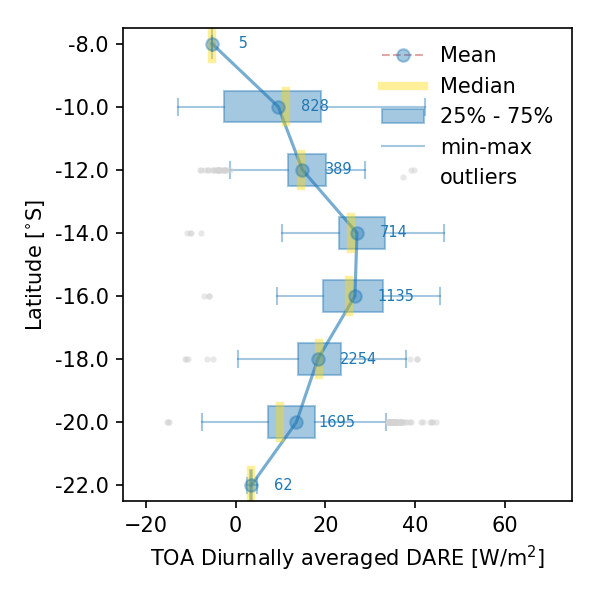

In [318]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_24,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
plt.xlim(-25,75)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')


plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
           ['Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=1,numpoints=1)
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_boxplot_NS_lat.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


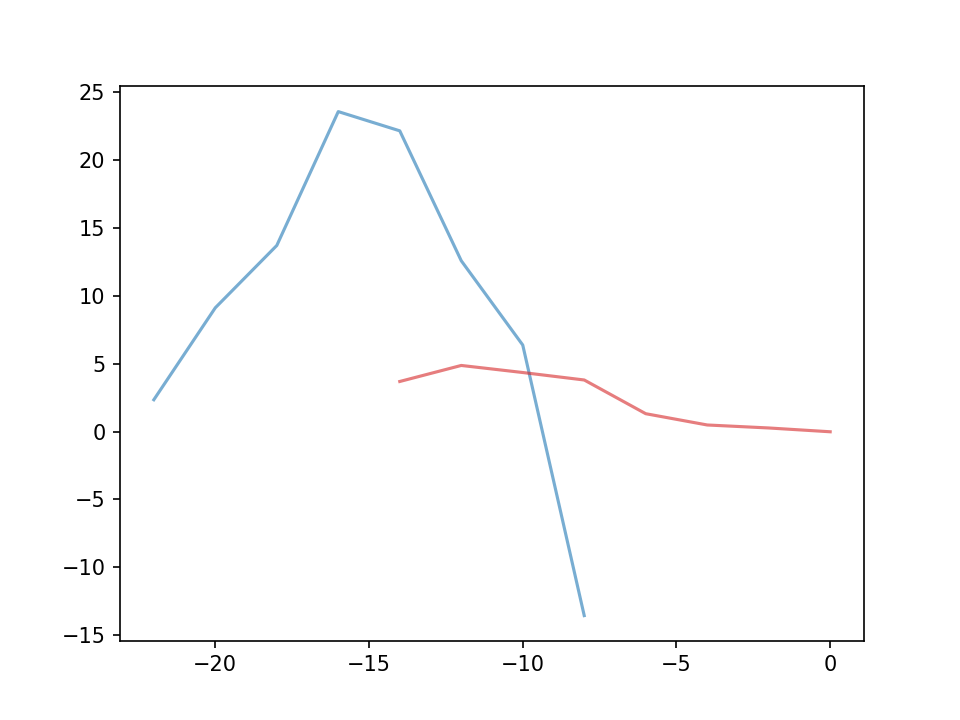

In [561]:
plt.figure()
plt.plot(dare_means[:,1],dare_means[:,0],'-',color='tab:blue',alpha=0.6,label='Diurnal Averaged Calc.')
plt.plot(AL_Lat,AL_dare_2016,'-',color='tab:red',alpha=0.6,label='ALADIN Diurnal Averages')

## Make box plot for 24h DARE, with clouds changing

In [ ]:
bins_ns_24,bins_ns_24_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & (s['lat'][igood]<=b[3]) & (np.isfinite(s['dare_24h'][igood,2]))
    bins_ns_24.append(s['dare_24h'][igood,2][ia])
    bins_ns_24_num.append(len(s['dare_24h'][igood,2][ia]))

In [ ]:
bins_ns_24h,bins_ns_24h_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (sh['lon']>= b[0]) & (sh['lon']<=b[1]) &(sh['lat']>=b[2]) &\
    (sh['lat']<=b[3]) & (np.isfinite(sh['dare_avg'][:,2]))
    bins_ns_24h.append(sh['dare_avg'][:,2][ia])
    bins_ns_24h_num.append(len(sh['dare_avg'][:,2][ia]))

In [149]:
binsd_ns_24h,binsd_ns_24h_num = [],[]
for i,b in enumerate(boxes_ns):
    ia = (shd['lon']>= b[0]) & (shd['lon']<=b[1]) &(shd['lat']>=b[2]) &\
    (shd['lat']<=b[3]) & (np.isfinite(shd['dare_avg'][:,2]))
    binsd_ns_24h.append(shd['dare_avg'][:,2][ia])
    binsd_ns_24h_num.append(len(shd['dare_avg'][:,2][ia]))

<IPython.core.display.Javascript object>


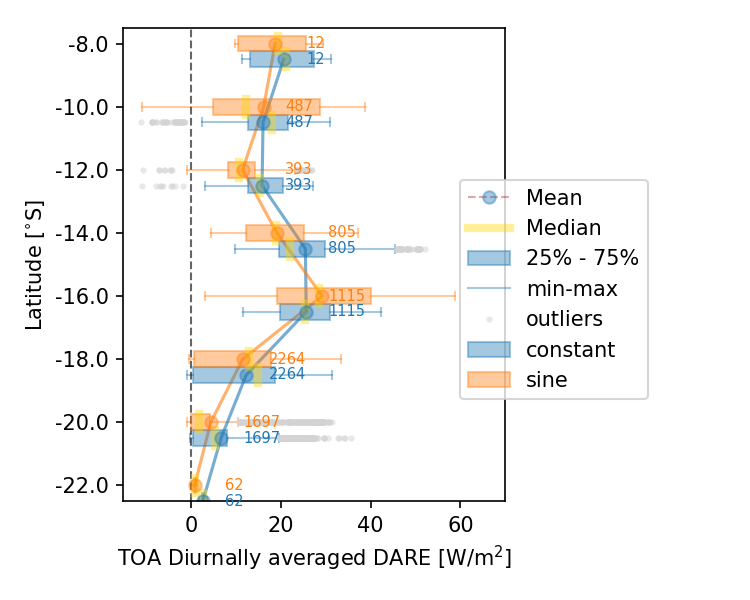

In [180]:
plt.figure(figsize=(5,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_24h,positions=ns_ct[:,1]-0.5,vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)
bpd = plt.boxplot(binsd_ns_24h,positions=ns_ct[:,1],vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')
color_boxes(bpd,'tab:orange')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
dare_meansd = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bpd['means']])
plt.plot(dare_meansd[:,0],dare_meansd[:,1],'-',color='tab:orange',alpha=0.6,label='Means')
plt.xlim(-15,70)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_24h_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1]-0.5,'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')
for j,nn in enumerate(binsd_ns_24h_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:orange',fontsize=7,verticalalignment='center',horizontalalignment='left')
#pu.prelim()
plt.axvline(0,ls='--',lw=1,color='k',alpha=0.6)

plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0],bp['boxes'][0],bpd['boxes'][0]],
           ['Mean','Median','25% - 75%','min-max','outliers','constant','sine'],
           frameon=True,loc=1,numpoints=1,bbox_to_anchor=[1.4,0.7])
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_from_calc_boxplot_NS_lat_withcl_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


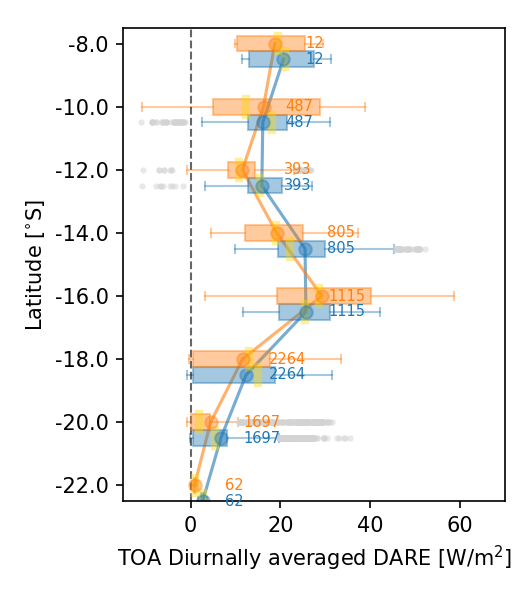

In [394]:
plt.figure(figsize=(3.55,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_24h,positions=ns_ct[:,1]-0.5,vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)
bpd = plt.boxplot(binsd_ns_24h,positions=ns_ct[:,1],vert=False,showfliers=True,widths=0.5,showmeans=True,patch_artist=True)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')
plt.ylabel('Latitude [$^{{\\circ}}$S]')

#plt.plot(s['angs_470_865'][s['fl_QA_angs']],s['GPS_Alt'][s['fl_QA_angs']],'.',alpha=0.005)
color_boxes(bp,'tab:blue')
color_boxes(bpd,'tab:orange')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
plt.plot(dare_means[:,0],dare_means[:,1],'-',color='tab:blue',alpha=0.6,label='Means')
dare_meansd = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bpd['means']])
plt.plot(dare_meansd[:,0],dare_meansd[:,1],'-',color='tab:orange',alpha=0.6,label='Means')
plt.xlim(-15,70)
#plt.ylim(0,2500)

for j,nn in enumerate(bins_ns_24h_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1]-0.5,'{:2.0f}'.format(nn),
                 color='tab:blue',fontsize=7,verticalalignment='center',horizontalalignment='left')
for j,nn in enumerate(binsd_ns_24h_num): 
    if nn>0:
        plt.text(min(bp['means'][j].get_data()[0])+5,ns_ct[j,1],'{:2.0f}'.format(nn),
                 color='tab:orange',fontsize=7,verticalalignment='center',horizontalalignment='left')
#pu.prelim()
plt.axvline(0,ls='--',lw=1,color='k',alpha=0.6)

#plt.legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0],bp['boxes'][0],bpd['boxes'][0]],
#           ['Mean','Median','25% - 75%','min-max','outliers','constant','sine'],
#           frameon=True,loc=1,numpoints=1,bbox_to_anchor=[1.4,0.7])
#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_from_calc_boxplot_NS_lat_withcl_noleg_{}.png'.format(vv),dpi=600,transparent=True)

In [171]:
sh['dare_avg'][sh['dare_avg'][:,2]==0,2] = np.nan
shd['dare_avg'][shd['dare_avg'][:,2]==0,2] = np.nan

<IPython.core.display.Javascript object>


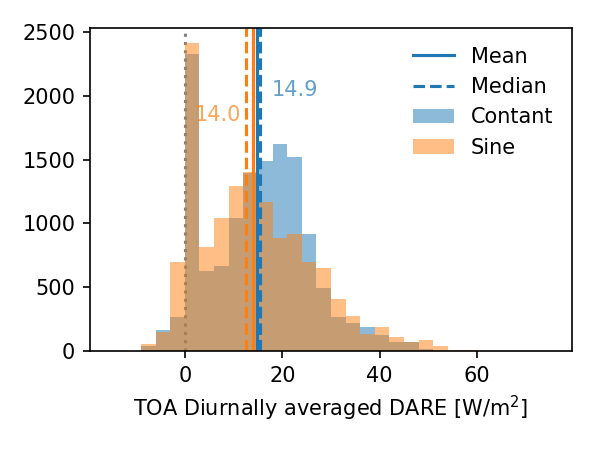

In [198]:
plt.figure(figsize=(4,3))
plt.hist(sh['dare_avg'][:,2],color='tab:blue',bins=30,range=[-15,75],alpha=0.5,label='Contant')
plt.hist(shd['dare_avg'][:,2],color='tab:orange',bins=30,range=[-15,75],alpha=0.5,label='Sine')

plt.axvline(0,ls=':',c='grey',zorder=-10)
plt.xlabel('TOA Diurnally averaged DARE [W/m$^2$]')


plt.axvline(np.nanmean(sh['dare_avg'][:,2]),ls='-',color='tab:blue',label='Mean')
plt.axvline(np.nanmedian(sh['dare_avg'][:,2]),ls='--',color='tab:blue',label='Median')
plt.text(np.nanmean(sh['dare_avg'][:,2])+3,2000,'{:3.1f}'.format(np.nanmean(sh['dare_avg'][:,2])),
         color='tab:blue',alpha=0.7)

plt.axvline(np.nanmean(shd['dare_avg'][:,2]),ls='-',color='tab:orange')
plt.axvline(np.nanmedian(shd['dare_avg'][:,2]),ls='--',color='tab:orange')
plt.text(np.nanmean(shd['dare_avg'][:,2])-12,1800,'{:3.1f}'.format(np.nanmean(shd['dare_avg'][:,2])),
         color='tab:orange',alpha=0.7)

plt.legend(frameon=False)
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_hist_{}.png'.format(vv),dpi=600,transparent=True)

In [182]:
np.nanmean(sh['dare_avg'][:,2]),np.nanmean(shd['dare_avg'][:,2]),\
np.nanstd(sh['dare_avg'][:,2]),np.nanstd(shd['dare_avg'][:,2])


(14.8630286410896, 13.97965924748887, 10.798669328078741, 12.082157452046944)

## Check for trends in underlying properties

In [381]:
s.keys()

[u'sza',
 'doys',
 u'lon',
 u'dn_avg',
 u'ref',
 u'dn',
 'dare_24h',
 u'asy',
 u'zout',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc',
 u'dn_noa',
 u'up_noa_avg',
 u'up',
 u'dare_avg',
 'mu',
 u'ext',
 u'doy',
 u'cod',
 u'dn_noa_avg',
 u'up_avg',
 u'up_noa']

In [382]:
s['wvl']

array([ 250.,  400.,  500.,  675.,  870.,  995., 4900.])

In [383]:
bins_ns_aod,bins_ns_aodn = [],[]
bins_ns_cod,bins_ns_codn = [],[]
bins_ns_clear,bins_ns_clearn = [],[]
bins_ns_ssa,bins_ns_ssan = [],[]
bins_ns_asy,bins_ns_asyn = [],[]
bins_ns_ref,bins_ns_refn = [],[]
for i,b in enumerate(boxes_ns):
    ia = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
          (s['lat'][igood]<=b[3]) & (np.isfinite(s['ext'][igood,2]))
    bins_ns_aod.append(s['ext'][igood,2][ia]*3.0)
    bins_ns_aodn.append(len(s['ext'][igood,2][ia]))
    ib = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
      (s['lat'][igood]<=b[3]) & (np.isfinite(s['cod'][igood]))
    bins_ns_cod.append(s['cod'][igood][ib])
    bins_ns_codn.append(len(s['cod'][igood][ib]))
    ic = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
      (s['lat'][igood]<=b[3]) & (np.isfinite(s['ssa'][igood,2]))
    bins_ns_ssa.append(s['ssa'][igood,2][ic])
    bins_ns_ssan.append(len(s['ssa'][igood,2][ic]))
    icc = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
          (s['lat'][igood]<=b[3]) & (np.isfinite(s['asy'][igood,2]))
    bins_ns_asy.append(s['asy'][igood,2][icc])
    bins_ns_asyn.append(len(s['asy'][igood,2][icc]))
    ie = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
          (s['lat'][igood]<=b[3]) & (np.isfinite(s['ref'][igood]))
    bins_ns_ref.append(s['ref'][igood][ie])
    bins_ns_refn.append(len(s['ref'][igood][ie]))
    iaf = (s['lon'][igood]>= b[0]) & (s['lon'][igood]<=b[1]) &(s['lat'][igood]>=b[2]) & \
          (s['lat'][igood]<=b[3]) & (np.isfinite(s['ref'][igood]))
    bins_ns_ref.append(s['ref'][igood][iaf])
    bins_ns_refn.append(len(s['ref'][igood][iaf]))

<IPython.core.display.Javascript object>


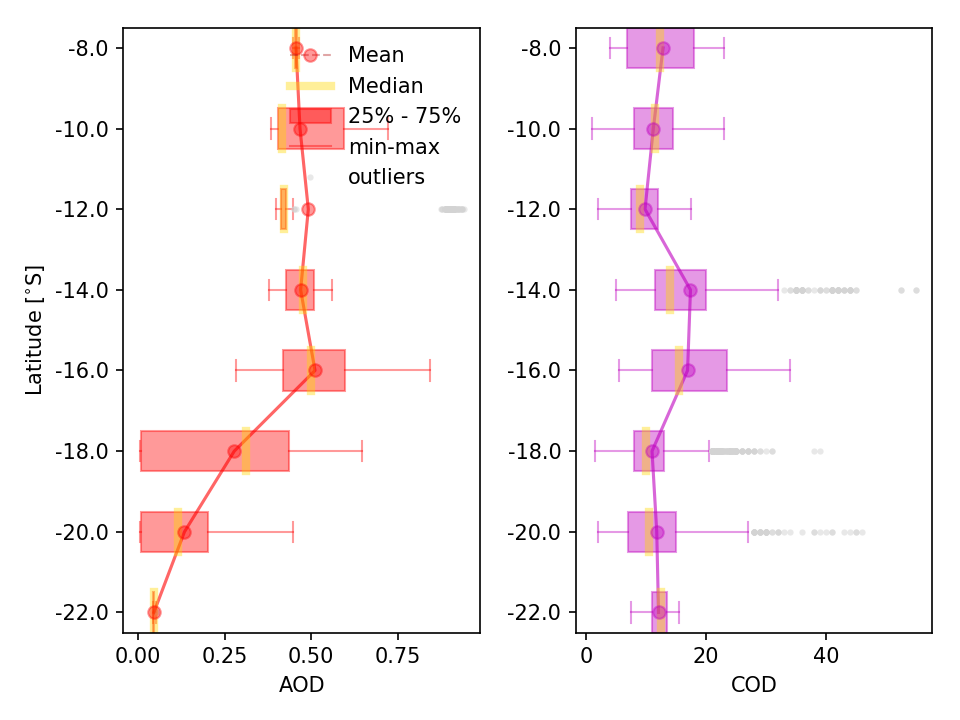

In [384]:
#plt.figure(figsize=(4,4))
fig,ax = plt.subplots(1,2)
ax=ax.ravel()
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = ax[0].boxplot(bins_ns_aod,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
ax[0].set_xlabel('AOD')
ax[0].set_ylabel('Latitude [$^{{\\circ}}$S]')

color_boxes(bp,'red')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
ax[0].plot(dare_means[:,0],dare_means[:,1],'-',color='red',alpha=0.6,label='Means')

ax[0].legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
           ['Mean','Median','25% - 75%','min-max','outliers'],
           frameon=False,loc=1,numpoints=1)

bc = ax[1].boxplot(bins_ns_cod,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
ax[1].set_xlabel('COD')
color_boxes(bc,'m')
cod_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bc['means']])
ax[1].plot(cod_means[:,0],cod_means[:,1],'-',color='m',alpha=0.6,label='Means')


#plt.title('In situ calculated extinction CLAP+neph: {}'.format(day))
plt.tight_layout()
#plt.savefig(fp+'plot_DARE/ORACLES2016_DARE_24h_boxplot_NS_lat.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


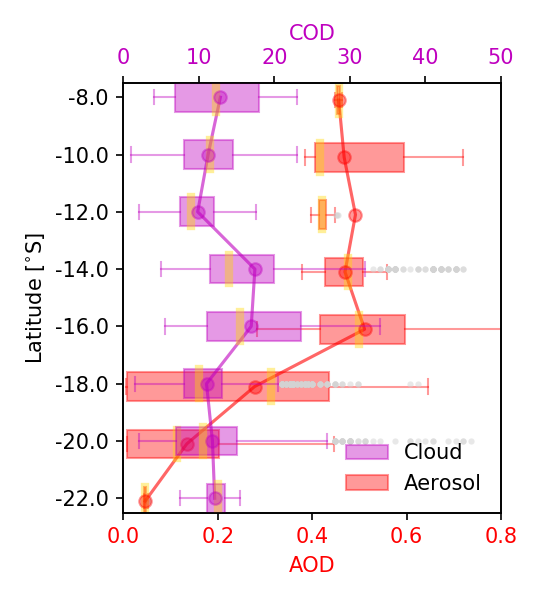

In [395]:
#plt.figure(figsize=(4,4))
fig,ax = plt.subplots(1,1,figsize=(3.6,4))
#ax=ax.ravel()
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = ax.boxplot(bins_ns_aod,positions=ns_ct[:,1]-0.1,vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
ax.set_xlabel('AOD',color='red')
ax.set_ylabel('Latitude [$^{{\\circ}}$S]')
ax.set_xlim(0,0.8)
color_boxes(bp,'red')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
ax.plot(dare_means[:,0],dare_means[:,1],'-',color='red',alpha=0.6,label='Means')

#ax[0].legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
#           ['Mean','Median','25% - 75%','min-max','outliers'],
#           frameon=False,loc=1,numpoints=1)
ax.tick_params(axis='x', labelcolor='red')

ax1 = ax.twiny()

bc = ax1.boxplot(bins_ns_cod,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
ax1.set_xlabel('COD',color='m')
color_boxes(bc,'m')
ax1.set_xlim(0,50)
cod_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bc['means']])
ax1.plot(cod_means[:,0],cod_means[:,1],'-',color='m',alpha=0.6,label='Means')
ax1.tick_params(axis='x', labelcolor='m')
ax1.legend([bc['boxes'][0],bp['boxes'][0]],['Cloud','Aerosol'],frameon=False,loc=4)

plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_COD_AOD_double_box_lat_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


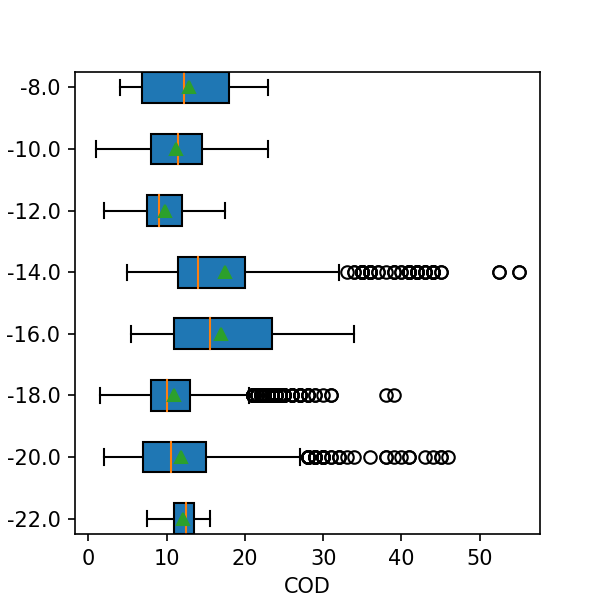

Text(0.5,0,'COD')

In [386]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_cod,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('COD')

<IPython.core.display.Javascript object>


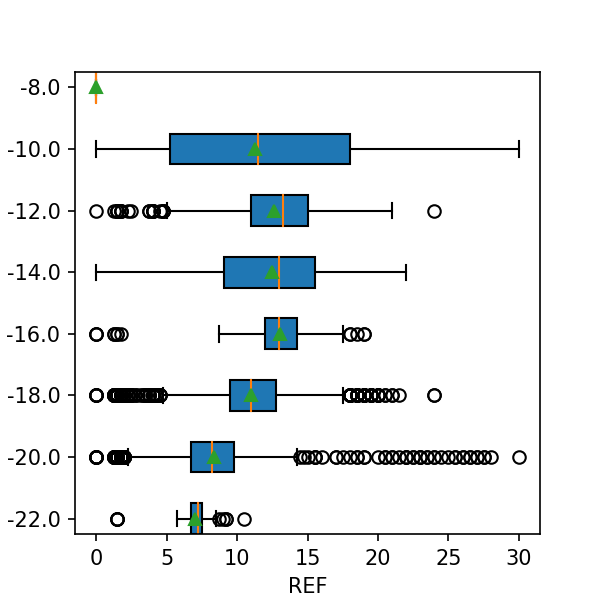

Text(0.5,0,'REF')

In [340]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_ref,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('REF')

<IPython.core.display.Javascript object>


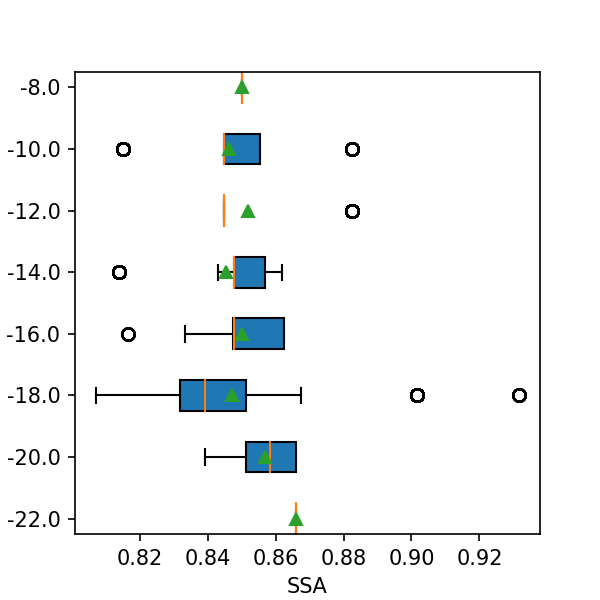

Text(0.5,0,'SSA')

In [338]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_ssa,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('SSA')

<IPython.core.display.Javascript object>


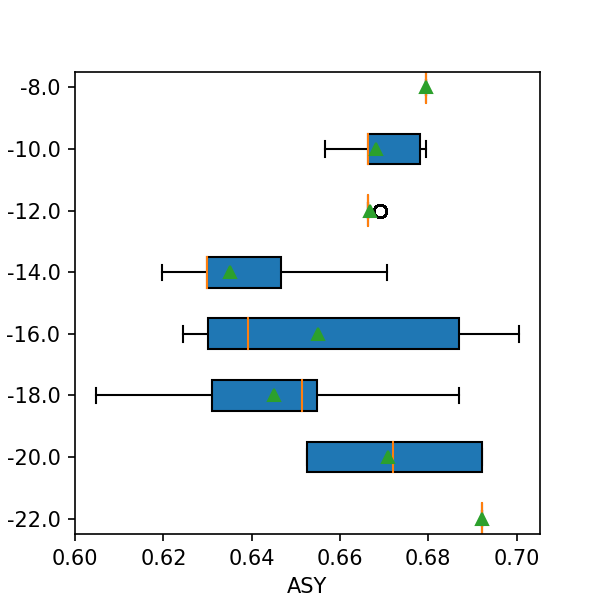

Text(0.5,0,'ASY')

In [339]:
plt.figure(figsize=(4,4))
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = plt.boxplot(bins_ns_asy,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
plt.xlabel('ASY')

<IPython.core.display.Javascript object>


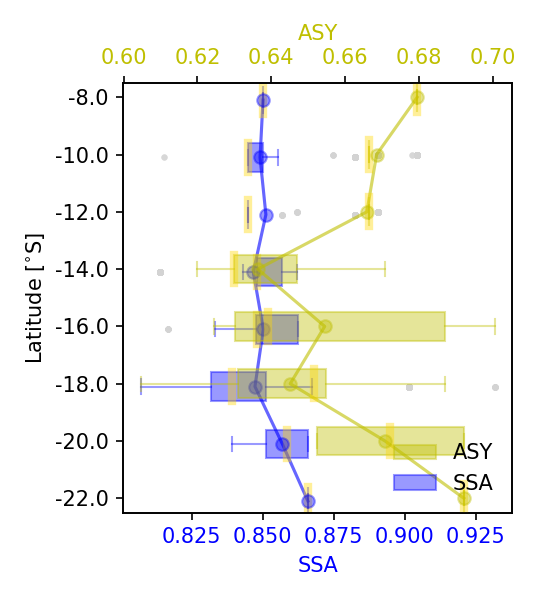

In [396]:
fig,ax = plt.subplots(1,1,figsize=(3.6,4))
#ax=ax.ravel()
#plt.plot(s['dare'][igood,2],s['lat'][igood],'.',alpha=0.05)
bp = ax.boxplot(bins_ns_ssa,positions=ns_ct[:,1]-0.1,vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
ax.set_xlabel('SSA',color='blue')
ax.set_ylabel('Latitude [$^{{\\circ}}$S]')
#ax.set_xlim(0,0.8)
color_boxes(bp,'blue')

dare_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bp['means']])
ax.plot(dare_means[:,0],dare_means[:,1],'-',color='blue',alpha=0.6,label='Means')

#ax[0].legend([bp['means'][0],bp['medians'][0],bp['boxes'][0],bp['whiskers'][0],bp['fliers'][0]],
#           ['Mean','Median','25% - 75%','min-max','outliers'],
#           frameon=False,loc=1,numpoints=1)
ax.tick_params(axis='x', labelcolor='blue')

ax1 = ax.twiny()

bc = ax1.boxplot(bins_ns_asy,positions=ns_ct[:,1],vert=False,showfliers=True,widths=1,showmeans=True,patch_artist=True)
ax1.set_xlabel('ASY',color='y')
color_boxes(bc,'y')
#ax1.set_xlim(0,50)
cod_means = np.array([[b.get_data()[0][0],b.get_data()[1][0]] for b in bc['means']])
ax1.plot(cod_means[:,0],cod_means[:,1],'-',color='y',alpha=0.6,label='Means')
ax1.tick_params(axis='x', labelcolor='y')
ax1.legend([bc['boxes'][0],bp['boxes'][0]],['ASY','SSA'],frameon=False,loc=4)

plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_SSA_ASY_double_box_NS_lat_{}.png'.format(vv),dpi=600,transparent=True)

## Cloud optical depth and ref diurnal variations

In [199]:
shd.keys()

[u'zout',
 u'refs',
 u'sza',
 u'cods',
 u'lon',
 u'dn_avg',
 u'ref',
 u'dn',
 u'asy',
 u'up_noa',
 u'wvl',
 u'lat',
 u'ssa',
 u'dare',
 u'utc',
 u'dn_noa',
 u'up_noa_avg',
 u'up',
 u'dare_avg',
 u'ext',
 u'doy',
 u'cod',
 u'dn_noa_avg',
 u'up_avg']

In [211]:
ishd = np.isfinite(shd['cods'][:,24])

In [261]:
mod = sio.loadmat(fp+'data_other/MODIS/MODIS_ORACLES2016_match.mat')

In [259]:
mod['mod']['time'][0,0][0,:].shape

(27672,)

<IPython.core.display.Javascript object>


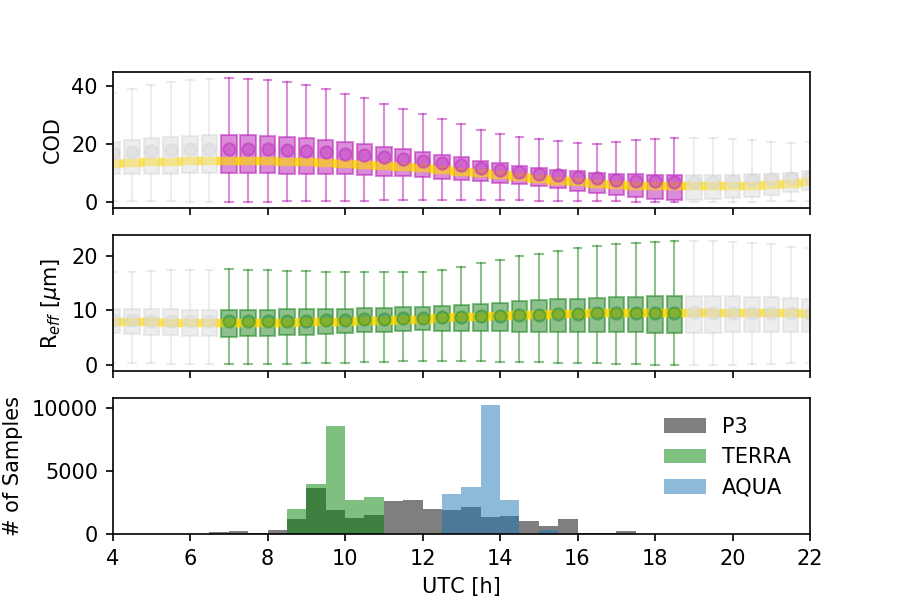

In [253]:
fig,ax = plt.subplots(3,1,figsize=(6,4),sharex=True)
utcs = np.arange(0,24,0.5)
bpd = ax[0].boxplot(shd['cods'][ishd,:],positions=utcs,showmeans=True,patch_artist=True,showfliers=False,widths=0.4)
color_boxes(bpd,'lightgrey')
bpd_day = ax[0].boxplot(shd['cods'][ishd,14:38],positions=utcs[14:38],showmeans=True,patch_artist=True,showfliers=False,widths=0.4)
color_boxes(bpd_day,'m')
ax[0].set_ylabel('COD')
ax[0].set_xlim([4,22])
ax[0].set_xticks(np.arange(0,24,2))
ax[0].set_xticklabels(np.arange(0,24,2))

bpd = ax[1].boxplot(shd['refs'][ishd,:],positions=utcs,showmeans=True,patch_artist=True,showfliers=False,widths=0.4)
color_boxes(bpd,'lightgrey')
bpd_day = ax[1].boxplot(shd['refs'][ishd,14:38],positions=utcs[14:38],showmeans=True,patch_artist=True,showfliers=False,widths=0.4)
color_boxes(bpd_day,'g')
ax[1].set_ylabel('R$_{{eff}}$ [$\mu$m]')
#ax[1].set_xlabel('UTC [h]')
ax[1].set_xlim([4,22])
ax[1].set_xticks(np.arange(0,24,2))
ax[1].set_xticklabels(np.arange(0,24,2))

ax[2].hist(shd['utc'],bins=48,alpha=0.5,range=[0,24],label='P3',normed=False,color='k')
ax[2].hist(mod['mod']['time'][0,0][0,:],bins=48,alpha=0.5,range=[0,24],label='TERRA',normed=False,color='green')
ax[2].hist(mod['myd']['time'][0,0][0,:],bins=48,alpha=0.5,range=[0,24],label='AQUA',normed=False,color='tab:blue')
ax[2].set_ylabel('# of Samples')

ax[2].legend(frameon=False)
ax[2].set_xlabel('UTC [h]')

ax[2].set_xticks(np.arange(0,24,2))
ax[2].set_xticklabels(np.arange(0,24,2))
ax[2].set_xlim([4,22])

plt.savefig(fp+'plot_DARE/ORACLES_2016_Cloud_diurnal_var.png',dpi=600,transparent=True)

In [262]:
mod['diurn'].dtype.names

('B_cod', 'A_ref', 'B_ref', 'utcs', 'iaes', 'A_cod')

## Plot cloud diurnal cycle amplitude

<IPython.core.display.Javascript object>


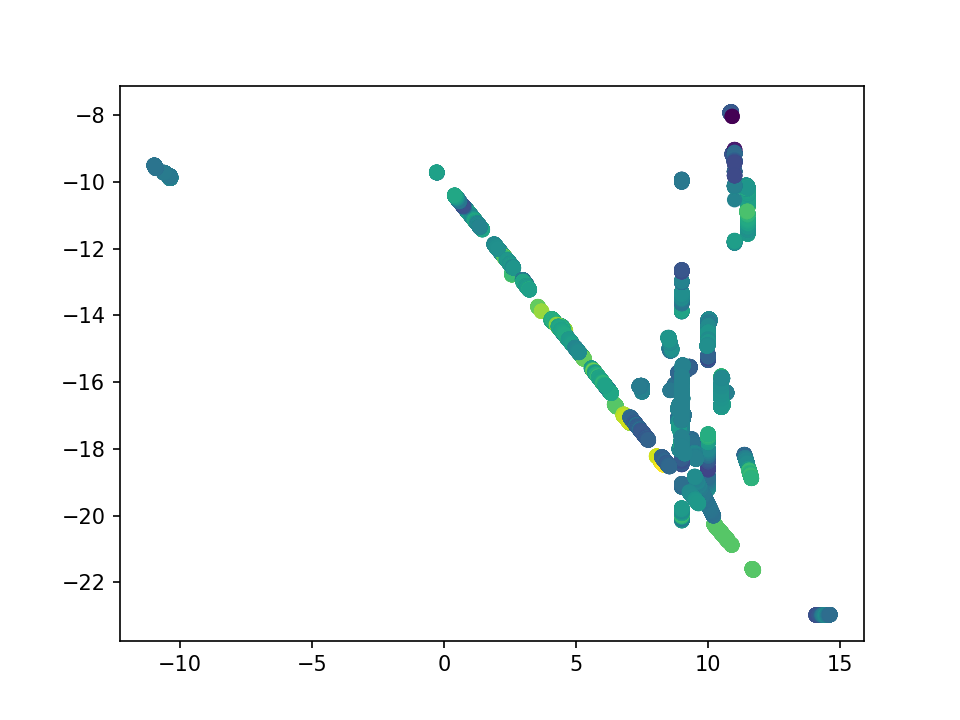

In [275]:
plt.figure()
plt.scatter(mod['mod']['lon'][0,0][0,mod['diurn']['iaes'][0,0][0,:]],
            mod['mod']['lat'][0,0][0,mod['diurn']['iaes'][0,0][0,:]],
            40.0,
            c=mod['diurn']['A_cod'][0,0][0,:])

<IPython.core.display.Javascript object>


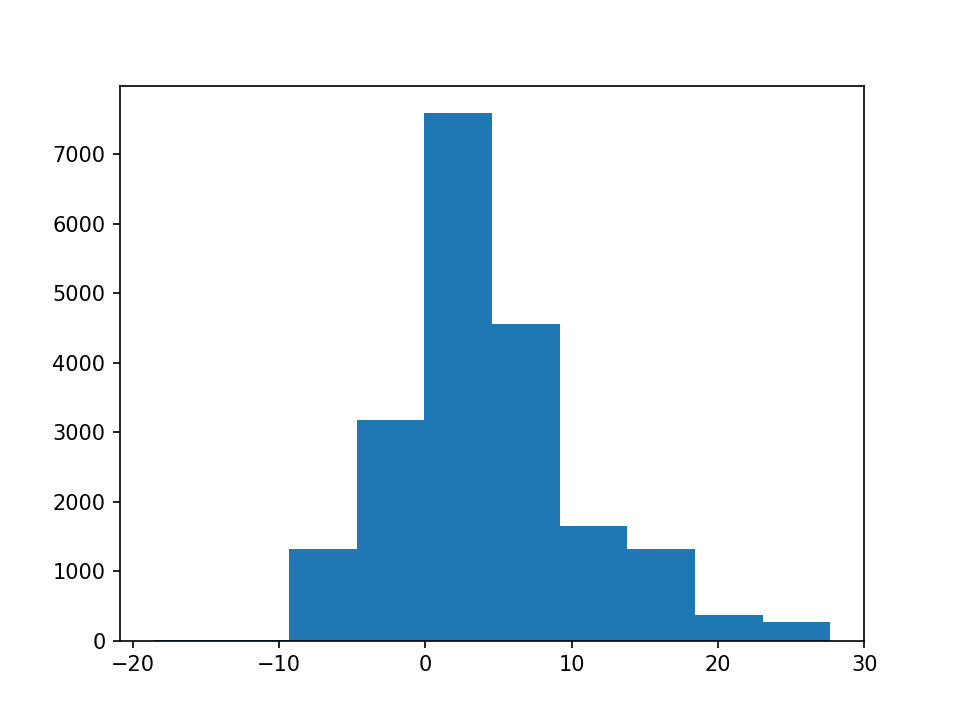

(array([   8.,    9., 1319., 3184., 7600., 4557., 1649., 1320.,  366.,
         272.]), array([-18.54538305, -13.92362358,  -9.30186411,  -4.68010465,
         -0.05834518,   4.56341429,   9.18517375,  13.80693322,
         18.42869268,  23.05045215,  27.67221162]), <a list of 10 Patch objects>)

In [276]:
plt.figure()
plt.hist(mod['diurn']['A_cod'][0,0][0,:])

In [277]:
import scipy.stats as stats

In [341]:
NX, NY = 50, 30
statistic, xedges, yedges, binnumber = stats.binned_statistic_2d(
    mod['mod']['lon'][0,0][0,mod['diurn']['iaes'][0,0][0,:]],
    mod['mod']['lat'][0,0][0,mod['diurn']['iaes'][0,0][0,:]], 
    values=mod['diurn']['A_cod'][0,0][0,:], statistic='mean', 
    bins=[np.arange(-11.0,15,0.5), np.arange(-23.0,-7.0,0.5)])

In [319]:
yedges,xedges,len(xedges),len(yedges)

(array([-23. , -22.5, -22. , -21.5, -21. , -20.5, -20. , -19.5, -19. ,
        -18.5, -18. , -17.5, -17. , -16.5, -16. , -15.5, -15. , -14.5,
        -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. , -10.5, -10. ,
         -9.5,  -9. ,  -8.5,  -8. ,  -7.5]),
 array([-11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,
         -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,
         -2. ,  -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,
          2.5,   3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,
          7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,
         11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5]),
 52,
 32)

In [320]:
xmean = [(x+xedges[i+1])/2.0 for i,x in enumerate(xedges[:-1])]
ymean = [(y+yedges[i+1])/2.0 for i,y in enumerate(yedges[:-1])]

<IPython.core.display.Javascript object>


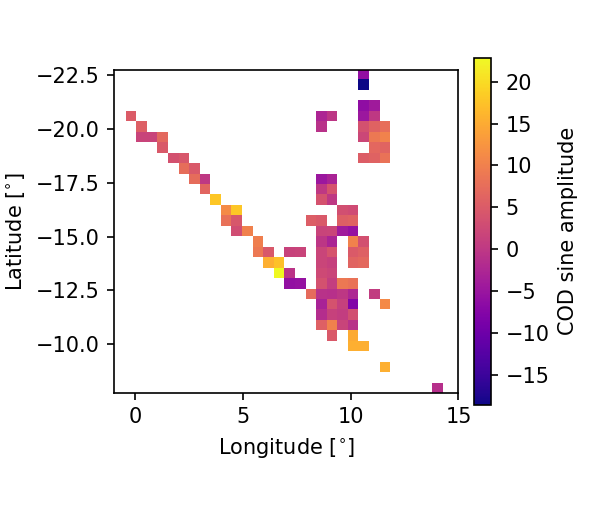

In [363]:
plt.figure(figsize=(4,3.5))
im = plt.imshow(statistic.T,extent=[xmean[0],xmean[-1],ymean[-1],ymean[0]],origin='low',cmap='plasma')
plt.xlabel('Longitude [$^{{\circ}}$]')
plt.ylabel('Latitude [$^{{\circ}}$]')
plt.xlim([-1,15])
plt.colorbar(im,label='COD sine amplitude',fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_COD_amplitude.png',dpi=600,transparent=True)

In [353]:
statisticr, xedgesr, yedgesr, binnumber = stats.binned_statistic_2d(
    mod['mod']['lon'][0,0][0,mod['diurn']['iaes'][0,0][0,:]],
    mod['mod']['lat'][0,0][0,mod['diurn']['iaes'][0,0][0,:]], 
    values=mod['diurn']['A_ref'][0,0][0,:], statistic='mean', 
    bins=[np.arange(-11.0,15,0.5), np.arange(-23.0,-7.0,0.5)])

In [354]:
xmeanr = [(x+xedgesr[i+1])/2.0 for i,x in enumerate(xedgesr[:-1])]
ymeanr = [(y+yedgesr[i+1])/2.0 for i,y in enumerate(yedgesr[:-1])]

<IPython.core.display.Javascript object>


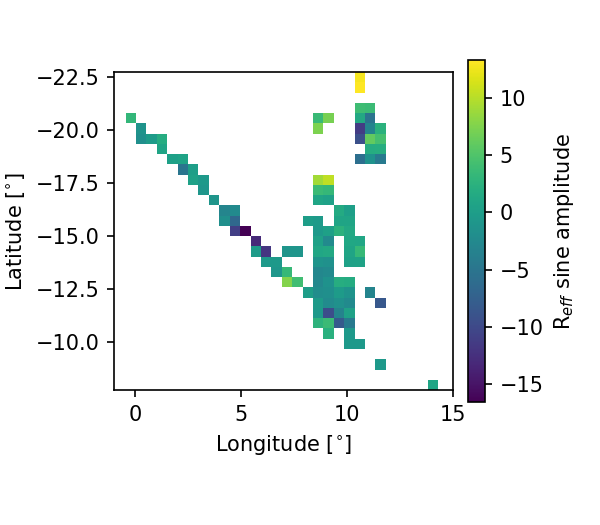

In [366]:
plt.figure(figsize=(4,3.5))
im = plt.imshow(statisticr.T,extent=[xmean[0],xmean[-1],ymean[-1],ymean[0]],origin='low')
plt.xlabel('Longitude [$^{{\circ}}$]')
plt.ylabel('Latitude [$^{{\circ}}$]')
plt.xlim([-1,15])
plt.colorbar(im,label='R$_{{eff}}$ sine amplitude',fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(fp+'plot_DARE/ORACLES_2016_REF_amplitude.png',dpi=600,transparent=True)

## Ratio of DARE 24h average to instantaneous

In [379]:
# need to ratio instantaneous dare from 's' to 24h averages from 'sh'

In [367]:
utcx = np.arange(0,24,0.5)

In [368]:
s['sza'].shape

(27672,)

<IPython.core.display.Javascript object>


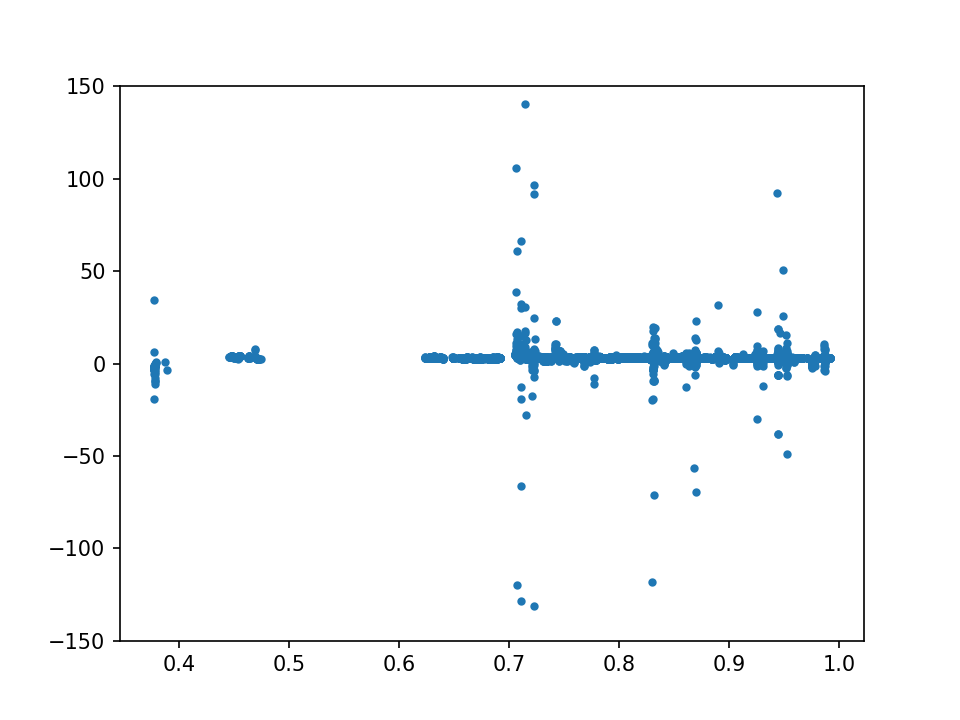

(-150, 150)

In [374]:
plt.figure()
plt.plot(s['mu'],s['dare'][:,2]/sh['dare_avg'][:,2],'.')
plt.ylim(-150,150)

In [557]:
ig = np.where(np.isfinite(sh['dare_avg'][:,2]) & np.isfinite(s['dare'][:,2]) &\
              (s['dare'][:,2]!=0.0) & (sh['dare_avg'][:,2] != 0.0) & (abs(sh['dare_avg'][:,2]) > 0.25) &\
               (abs(s['dare'][:,2])>0.25))[0]

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [375]:
len(ig)

12680

<IPython.core.display.Javascript object>


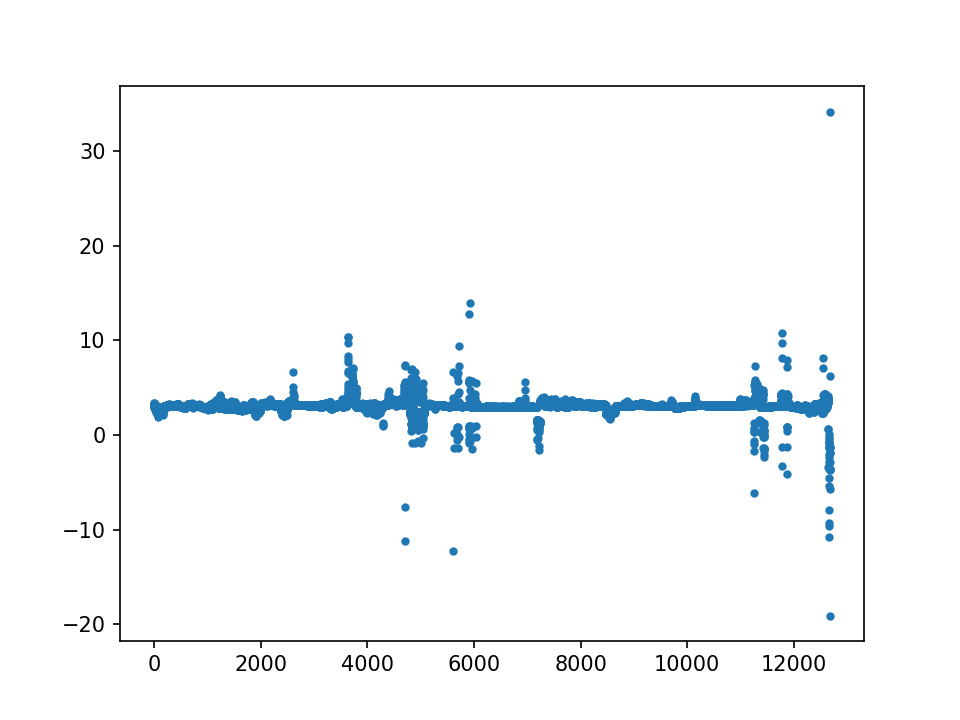

In [376]:
plt.figure()
plt.plot(s['dare'][ig,2]/sh['dare_avg'][ig,2],'.')

In [378]:
ii = 14610

In [379]:
s['dare'][ig[ii],2]

IndexError: index 14610 is out of bounds for axis 0 with size 12680

In [530]:
sh['dare_avg'][ig[ii],2]

0.22099363178833284

In [ ]:
plt.figure()
plt.plot(s['dare'][ig[ii],2])

In [534]:
i2d.shape

(154, 2)

<IPython.core.display.Javascript object>


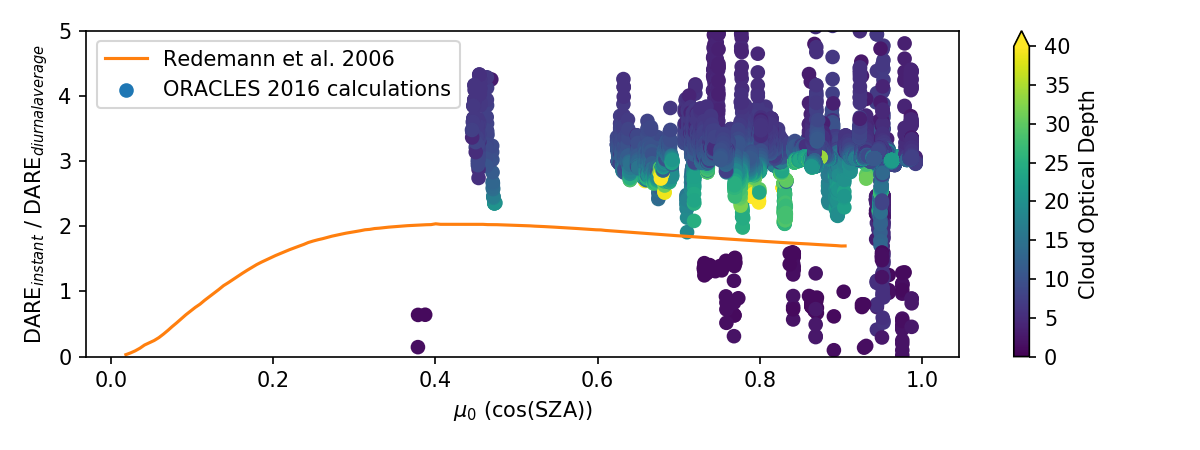

In [380]:
plt.figure(figsize=(8,3))
plt.scatter(s['mu'][ig],s['dare'][ig,2]/sh['dare_avg'][ig,2],c=s['cod'][ig],vmin=0,vmax=40,label='ORACLES 2016 calculations')
plt.plot(i2d[:,0],i2d[:,1],label='Redemann et al. 2006',c='tab:orange')
plt.ylim(0,5)

plt.ylabel('DARE$_{{instant}}$ / DARE$_{{diurnal average}}$')
plt.xlabel('$\mu_0$ (cos(SZA))')
plt.legend()
plt.colorbar(label='Cloud Optical Depth',extend='max')
plt.tight_layout()
#plt.savefig(fp+'plot_DARE/ORACLES_2016_DARE_ratio_instant_to_24h.png',dpi=600,transparent=True)
